# EDA

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import datetime
import os

from utils import *

In [258]:
# # # 가려지는 열 전부 출력 
# #모든 열 출력
# pd.set_option('display.max_columns', None)

# #모든 행 출력 (너무 많으면 경고)
# pd.set_option('display.max_rows', None)

# #너무 긴 데이터도 줄바꿈 없이 전체 출력
# pd.set_option('display.expand_frame_repr', False)

# #각 열의 너비 제한 해제 (기본값: 50)
# pd.set_option('display.max_colwidth', None)

sns.set_theme(style="dark",
              palette= "deep")

In [177]:
df_tran = pd.read_csv("data/train_transaction.csv")
df_id   = pd.read_csv("data/train_identity.csv")

In [257]:
resumetable(df_tran)

Dataset Shape: (590540, 399)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,TransactionID,int64,0,590540,2987000,2987001,2987002
1,isFraud,int64,0,2,0,0,0
2,TransactionDT,datetime64[ns],0,573349,2017-12-02 00:00:00,2017-12-02 00:00:01,2017-12-02 00:01:09
3,TransactionAmt,float64,0,20902,68.5,29.0,59.0
4,ProductCD,object,0,5,W,W,W
5,card1,int64,0,13553,13926,2755,4663
6,card2,float64,8933,500,NaN,404.0,490.0
7,card3,float64,1565,114,150.0,150.0,150.0
8,card4,object,1577,4,discover,mastercard,visa
9,card5,float64,4259,119,142.0,102.0,166.0


## Target Distribution

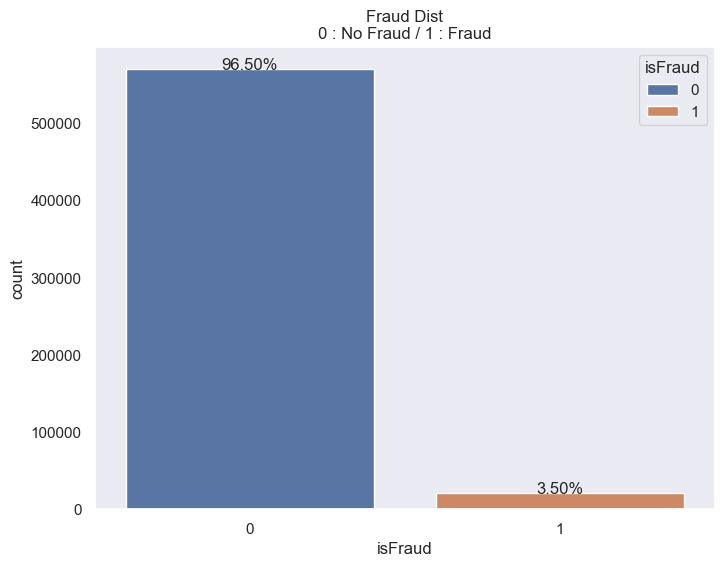

In [75]:
total = len(df_tran)

plt.figure(figsize= (8,6))
p1 = sns.countplot(data=df_tran, x= "isFraud", hue = "isFraud")
p1.set_title("Fraud Dist\n0 : No Fraud / 1 : Fraud")
for p in p1.patches:
    height = p.get_height()
    if height > 0:    
        p1.text(p.get_x()+p.get_width()/2., 
                height + 3,
                f"{height/total*100:1.2f}%",
                ha = "center", fontsize = 12)
        
plt.show()


## Transaction Amount

In [6]:
df_tran[["TransactionAmt"]].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

,TransactionAmt
count,590540.000000
mean,135.027176
std,239.162522
min,0.251000
1%,9.244000
25%,43.321000
50%,68.769000
75%,125.000000
99%,1104.000000
max,31937.391000


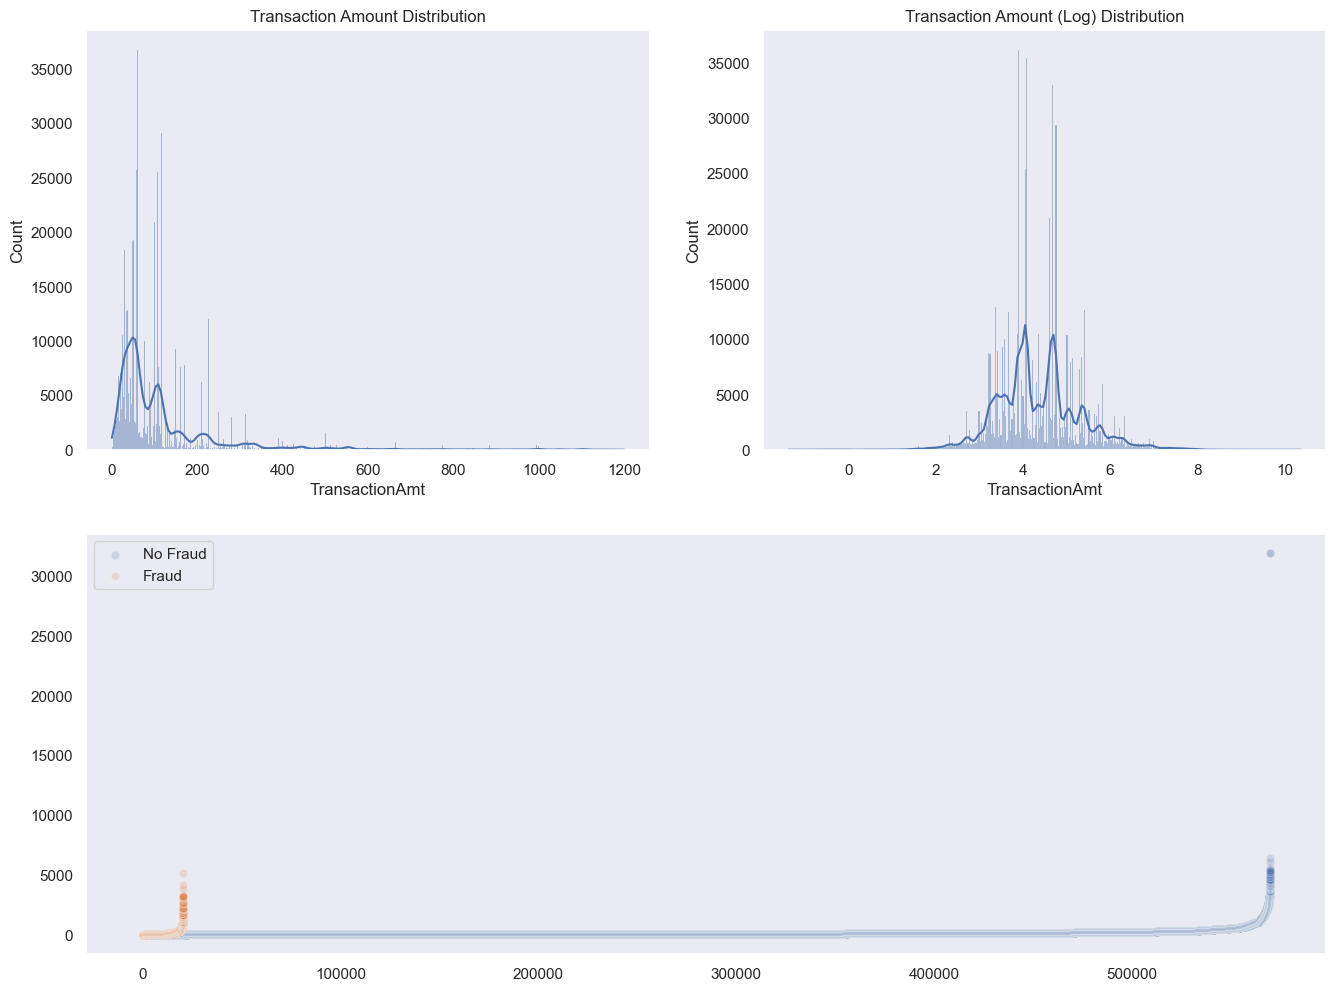

In [76]:
plt.figure(figsize=(16, 12))
plt.subplot(2,2,1)
p1 = sns.histplot(df_tran[df_tran["TransactionAmt"] < 1200]["TransactionAmt"], kde=True)
p1.set_title("Transaction Amount Distribution")


plt.subplot(2,2,2)
p2 = sns.histplot(np.log(df_tran["TransactionAmt"]), kde=True)
p2.set_title("Transaction Amount (Log) Distribution")

plt.subplot(2,1,2)

p3 = sns.scatterplot(x = np.arange(sum(df_tran["isFraud"] == 0)), 
                     y = np.sort(df_tran[df_tran["isFraud"] == 0]["TransactionAmt"].values), label = "No Fraud", alpha = 0.2)
p3 = sns.scatterplot(x = np.arange(sum(df_tran["isFraud"] == 1)), 
                     y = np.sort(df_tran[df_tran["isFraud"] == 1]["TransactionAmt"].values), label = "Fraud", alpha = 0.2)

plt.show()


In [ ]:
CalcOutliers(df_tran["TransactionAmt"])

Identified lowest outliers: 0
Identified upper outliers: 10093
Total outlier observations: 10093
Non-outlier observations: 580447
Total percentual of Outliers:  1.7388


## ProductCD

Text(0.5, 1.0, 'Transaction Amount Distribuition by ProductCD and Target')

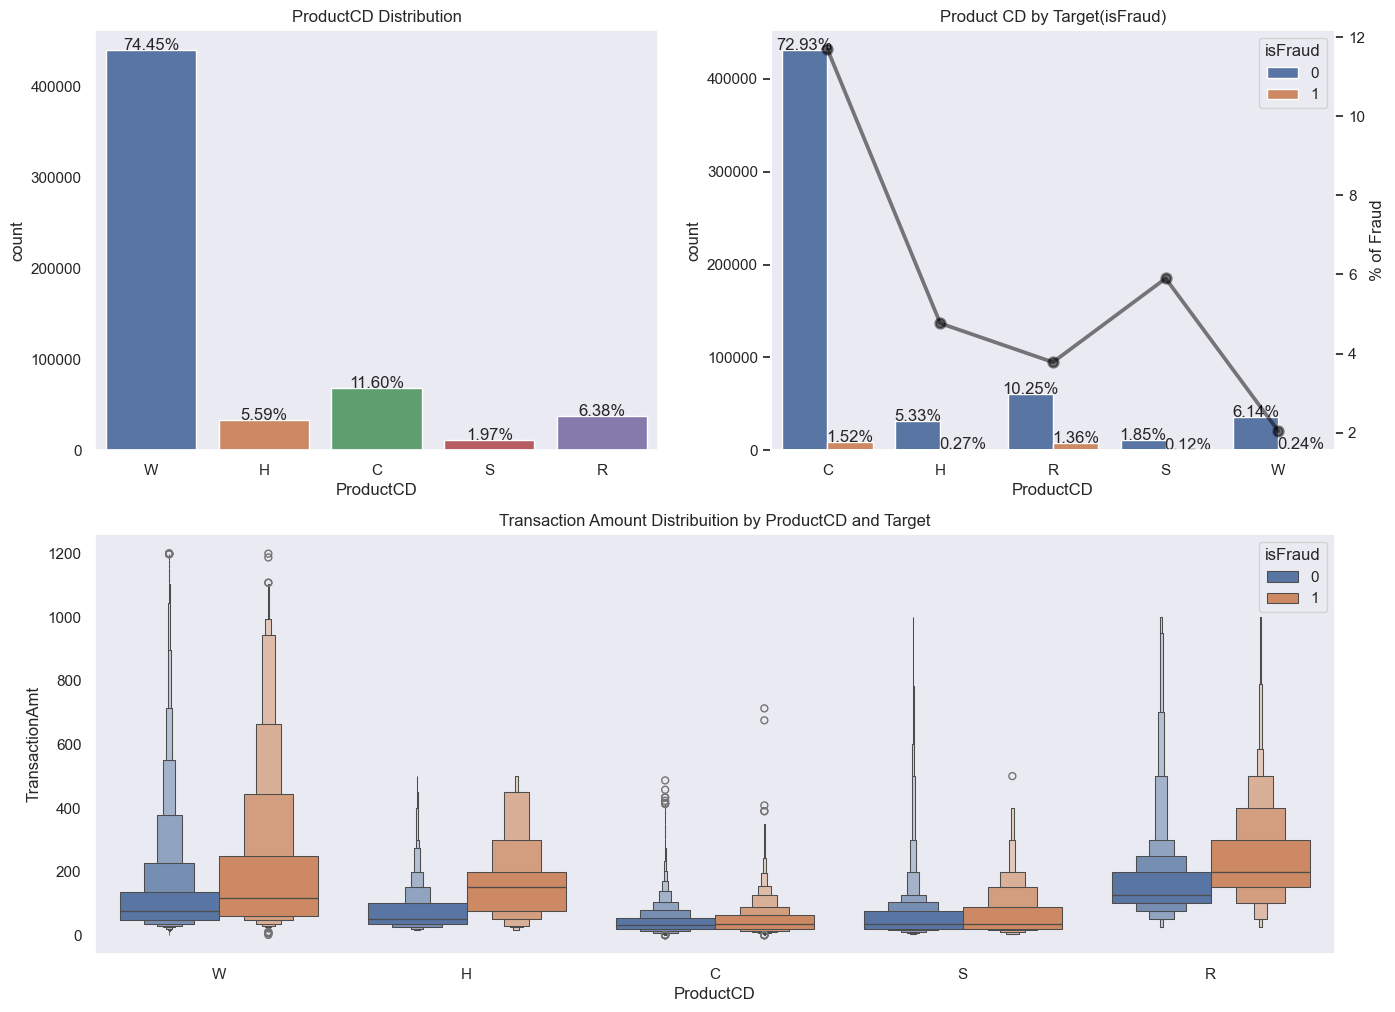

In [88]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
p1 = sns.countplot(data=df_tran, x = "ProductCD", hue="ProductCD")
p1.set_title("ProductCD Distribution")
for p in p1.patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width()/2.,
                height + 3,
                f"{height/total*100:1.2f}%",
                ha = "center", fontsize = 12)

plt.subplot(2,2,2)
p2 = sns.countplot(data=df_tran, x="ProductCD", hue="isFraud")
p2.set_title("Product CD by Target(isFraud)")
for p in p2.patches:
    height = p.get_height()
    if height > 0:    
        plt.text(p.get_x() + p.get_width()/2.,
                height + 3,
                f"{height/total*100:1.2f}%",
                ha = "center", fontsize = 12)

tmp = pd.crosstab(df_tran['ProductCD'], df_tran['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

pt = p2.twinx()
pt = sns.pointplot(data = tmp, x = "ProductCD", y = "Fraud", color= "black", alpha = 0.5)
pt.set_ylabel("% of Fraud")



plt.subplot(2,1,2)
p3 = sns.boxenplot(x="ProductCD", y="TransactionAmt", data=df_tran[df_tran["TransactionAmt"] < 1200], hue="isFraud")
p3.set_title("Transaction Amount Distribuition by ProductCD and Target")



## Card Features

In [20]:
resumetable(df_tran[['card1', 'card2', 'card3','card4', 'card5', 'card6']])

Dataset Shape: (590540, 6)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,card1,int64,0,13553,13926,2755,4663
1,card2,float64,8933,500,NaN,404.0,490.0
2,card3,float64,1565,114,150.0,150.0,150.0
3,card4,object,1577,4,discover,mastercard,visa
4,card5,float64,4259,119,142.0,102.0,166.0
5,card6,object,1571,4,credit,credit,debit


- card4 와 card6 은 범주형 변수
- card3, card5 는 numerical 이지만 unique value 가 많아 보이지 않음

In [ ]:
df_tran[['card1', 'card2', 'card3', 'card5']].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
1%,1338.000000,100.000000,144.000000,102.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
99%,18238.000000,583.000000,185.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


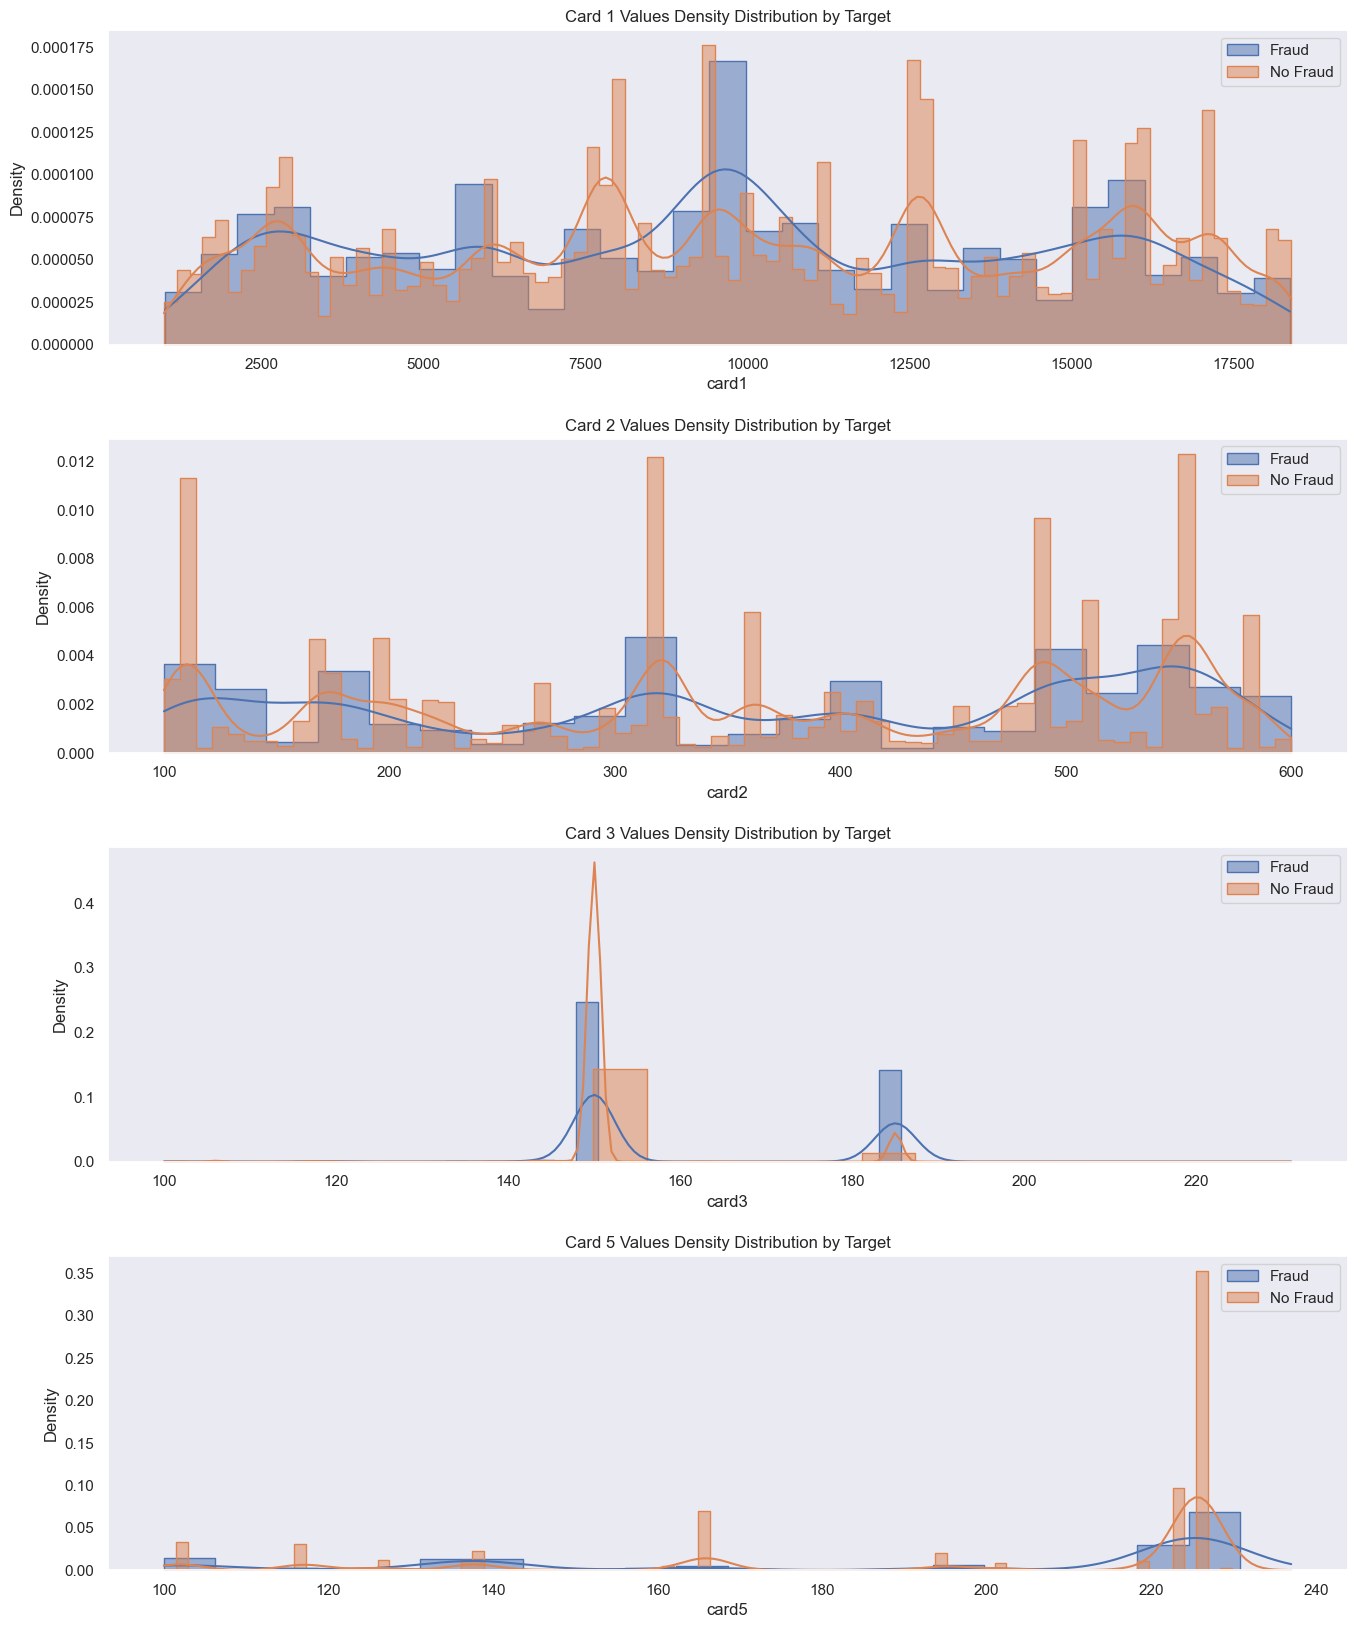

In [78]:
plt.figure(figsize=(16,20))

plt.subplot(4,1,1)
p1 = sns.histplot(data=df_tran[df_tran["isFraud"] == 1], x = "card1", kde=True, element= "step", stat="density", label = "Fraud")
p1 = sns.histplot(data=df_tran[df_tran["isFraud"] == 0], x = "card1", kde=True, element= "step", stat="density", label = "No Fraud")
p1.legend()
p1.set_title("Card 1 Values Density Distribution by Target")

plt.subplot(4,1,2)
p2 = sns.histplot(data=df_tran[df_tran["isFraud"] == 1], x = "card2", kde=True, element= "step", stat="density", label = "Fraud")
p2 = sns.histplot(data=df_tran[df_tran["isFraud"] == 0], x = "card2", kde=True, element= "step", stat="density", label = "No Fraud")
p2.legend()
p2.set_title("Card 2 Values Density Distribution by Target")

plt.subplot(4,1,3)
p3 = sns.histplot(data=df_tran[df_tran["isFraud"] == 1], x = "card3", kde=True, element= "step", stat="density", label = "Fraud")
p3 = sns.histplot(data=df_tran[df_tran["isFraud"] == 0], x = "card3", kde=True, element= "step", stat="density", label = "No Fraud")
p3.legend()
p3.set_title("Card 3 Values Density Distribution by Target")

plt.subplot(4,1,4)
p4 = sns.histplot(data=df_tran[df_tran["isFraud"] == 1], x = "card5", kde=True, element= "step", stat="density", label = "Fraud")
p4 = sns.histplot(data=df_tran[df_tran["isFraud"] == 0], x = "card5", kde=True, element= "step", stat="density", label = "No Fraud")
p4.legend()
p4.set_title("Card 5 Values Density Distribution by Target")

plt.subplots_adjust(hspace= 0.3)

- 범주형 데이터 (card4, card6)

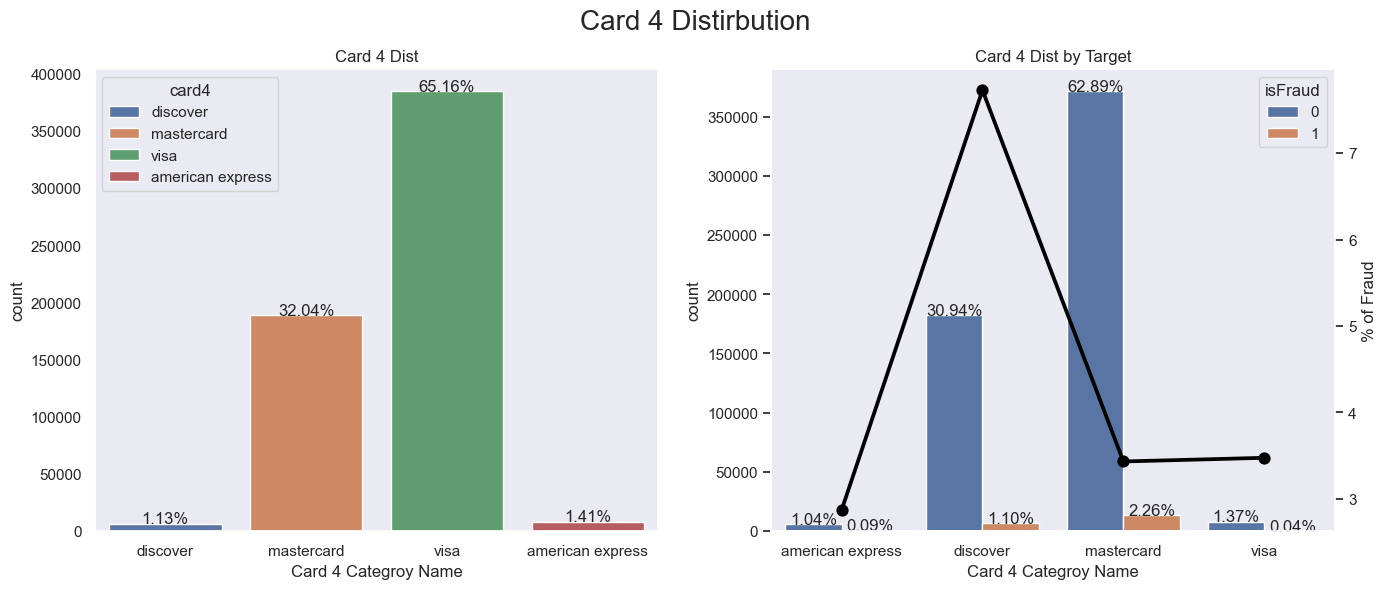

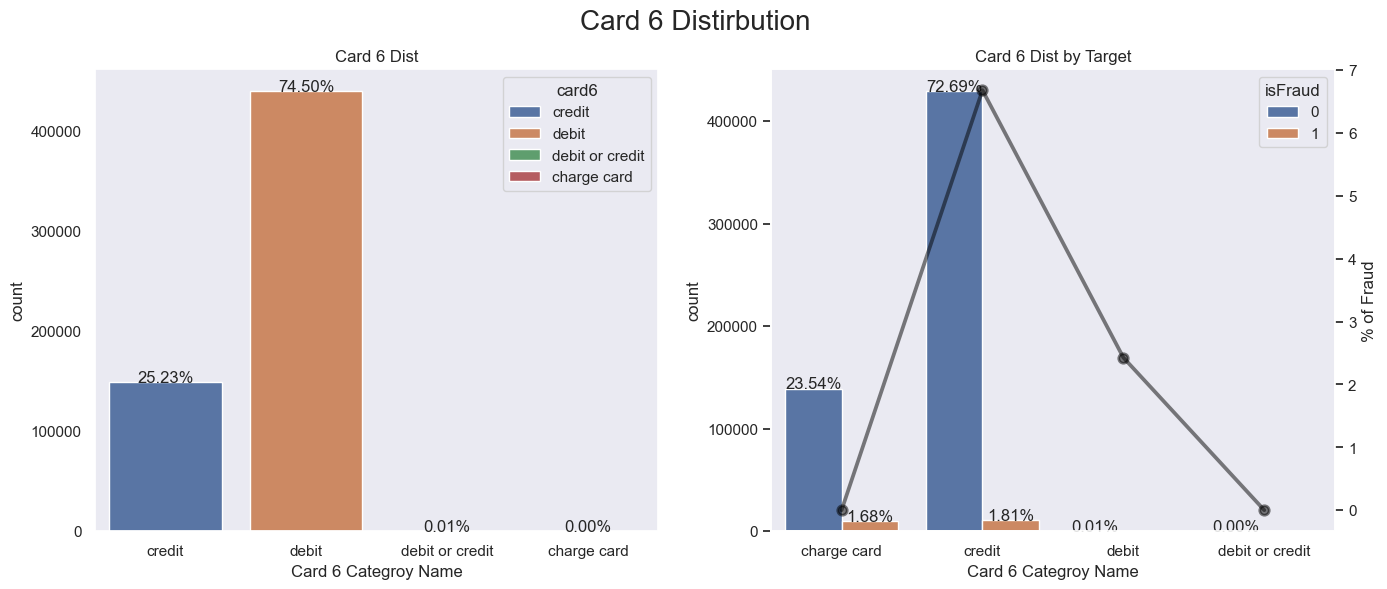

In [89]:
plt.figure(figsize=(16, 6))

plt.suptitle("Card 4 Distirbution", fontsize = 20)
plt.subplot(1,2,1)
p1 = sns.countplot(data= df_tran, x = "card4", hue = "card4")
p1.set_title("Card 4 Dist")
p1.set_xlabel("Card 4 Categroy Name")
for p in p1.patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width()/2.,
                height + 3,
                f"{height/total*100:1.2f}%",
                ha = "center", fontsize = 12)

plt.subplot(1,2,2)
p2 = sns.countplot(data=df_tran, x = "card4", hue= "isFraud")
p2.set_title("Card 4 Dist by Target")
p2.set_xlabel("Card 4 Categroy Name")
for p in p2.patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width()/2.,
                height + 3,
                f"{height/total*100:1.2f}%",
                ha = "center", fontsize = 12)

tmp = pd.crosstab(df_tran['card4'], df_tran['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

pt = p2.twinx()
pt = sns.pointplot(data = tmp, x = "card4", y = "Fraud", color= "black")
pt.set_ylabel("% of Fraud")




plt.figure(figsize=(16, 6))

plt.suptitle("Card 6 Distirbution", fontsize = 20)
plt.subplot(1,2,1)
p3 = sns.countplot(data= df_tran, x = "card6", hue = "card6")
p3.set_title("Card 6 Dist")
p3.set_xlabel("Card 6 Categroy Name")
for p in p3.patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width()/2.,
                height + 3,
                f"{height/total*100:1.2f}%",
                ha = "center", fontsize = 12)

plt.subplot(1,2,2)
p4 = sns.countplot(data=df_tran, x = "card6", hue= "isFraud")
p4.set_title("Card 6 Dist by Target")
p4.set_xlabel("Card 6 Categroy Name")
for p in p4.patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width()/2.,
                height + 3,
                f"{height/total*100:1.2f}%",
                ha = "center", fontsize = 12)

tmp = pd.crosstab(df_tran['card6'], df_tran['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

pt = p4.twinx()
pt = sns.pointplot(data = tmp, x = "card6", y = "Fraud", color= "black", alpha = 0.5)
pt.set_ylabel("% of Fraud")



plt.show()


## M1 ~ M9 Features

In [92]:
resumetable(df_tran[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']])

Dataset Shape: (590540, 9)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,M1,object,271100,2,T,NaN,T
1,M2,object,271100,2,T,NaN,T
2,M3,object,271100,2,T,NaN,T
3,M4,object,281444,3,M2,M0,M0
4,M5,object,350482,2,F,T,F
5,M6,object,169360,2,T,T,F
6,M7,object,346265,2,NaN,NaN,F
7,M8,object,346252,2,NaN,NaN,F
8,M9,object,346252,2,NaN,NaN,F


- 모든 변수가 결측값이 매우많은 형태를 가짐
- 각 변수별 영향을 확인해보고 필요없으면 버리는 판단이 필요

In [103]:
M_df = df_tran[['isFraud','M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']].fillna('Missing')

In [101]:
def plot_dist(data, col):
    plt.figure(figsize=(16,6))
    plt.suptitle(f"{col} Distribution", fontsize = 20)
    plt.subplot(1,2,1)
    p1 = sns.countplot(data= data, x = col, hue = col)
    p1.set_title(f"{col} Dist")
    p1.set_xlabel(f"{col} Categroy Name")
    for p in p1.patches:
        height = p.get_height()
        if height > 0:
            plt.text(p.get_x() + p.get_width()/2.,
                    height + 3,
                    f"{height/total*100:1.2f}%",
                    ha = "center", fontsize = 12)

    plt.subplot(1,2,2)
    p2 = sns.countplot(data= data, x = col, hue= "isFraud")
    p2.set_title(f"{col} Dist by Target")
    p2.set_xlabel(f"{col} Categroy Name")
    for p in p2.patches:
        height = p.get_height()
        if height > 0:
            plt.text(p.get_x() + p.get_width()/2.,
                    height + 3,
                    f"{height/total*100:1.2f}%",
                    ha = "center", fontsize = 12)
            
    tmp = pd.crosstab(data[col], df_tran['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

    pt = p2.twinx()
    pt = sns.pointplot(data = tmp, x = col, y = "Fraud", color= "black", alpha = 0.5)
    pt.set_ylabel("% of Fraud")


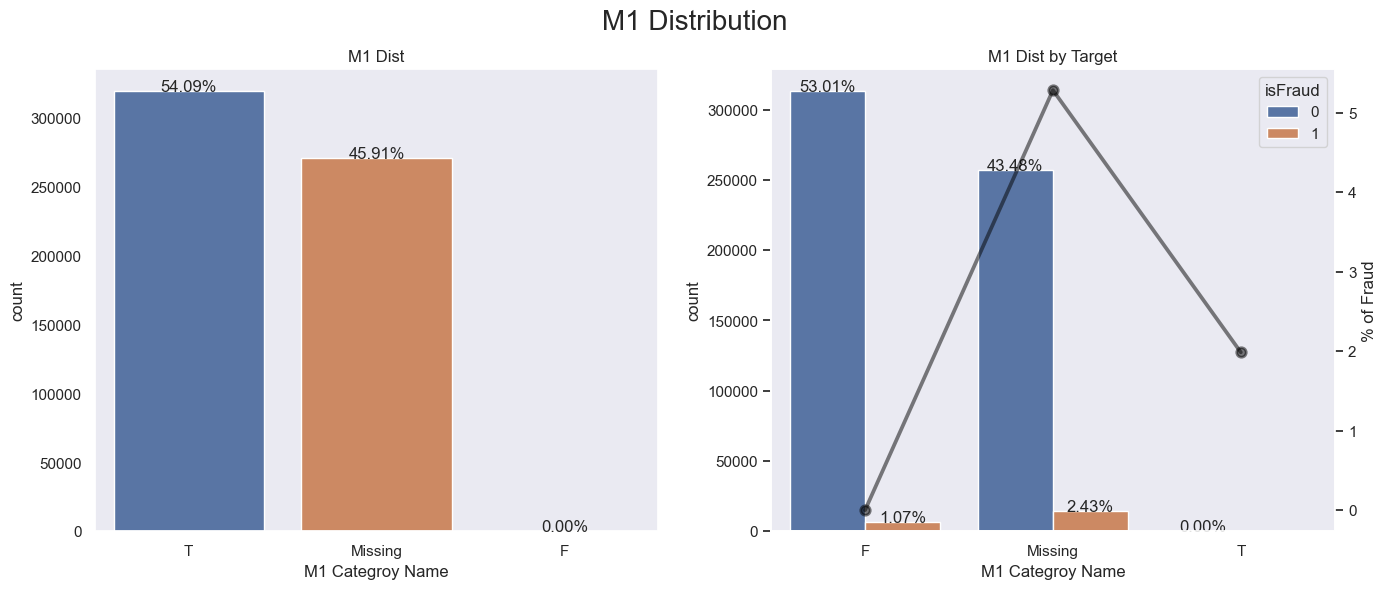

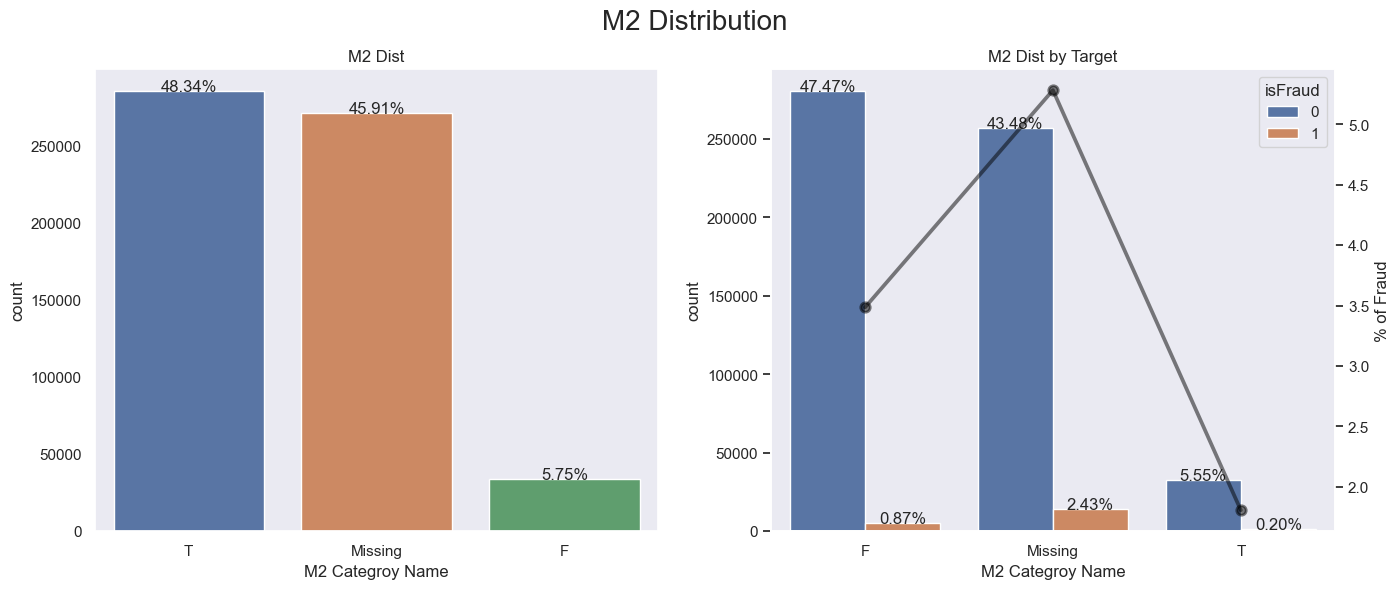

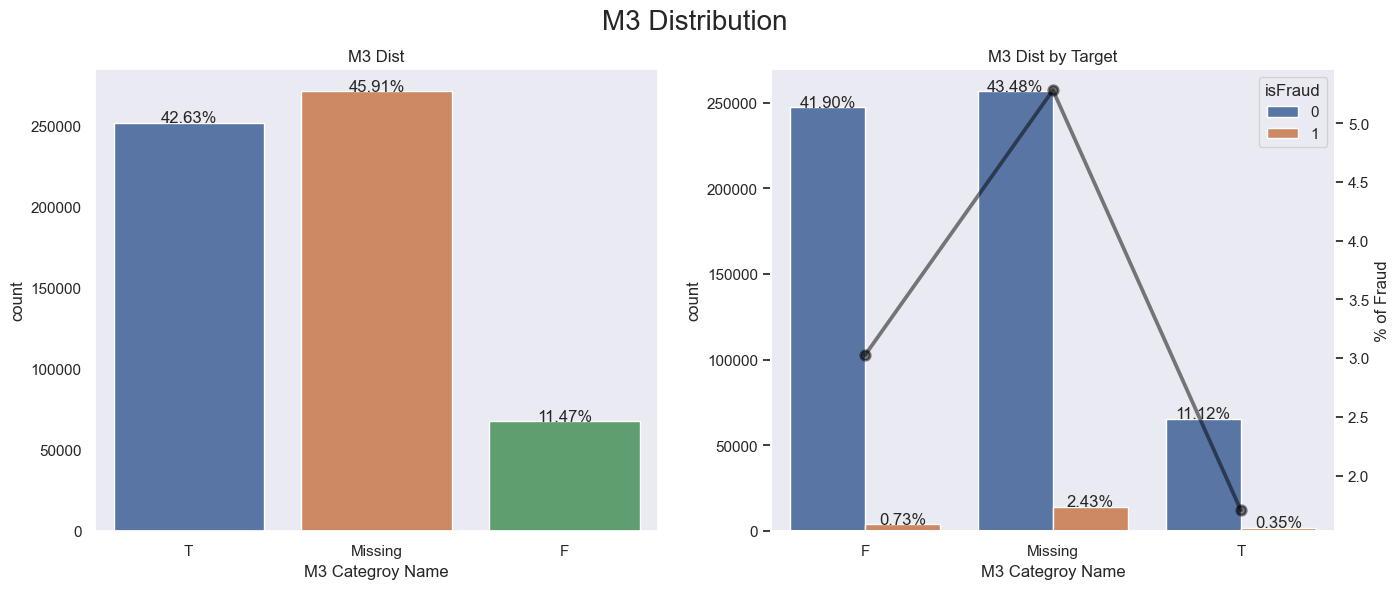

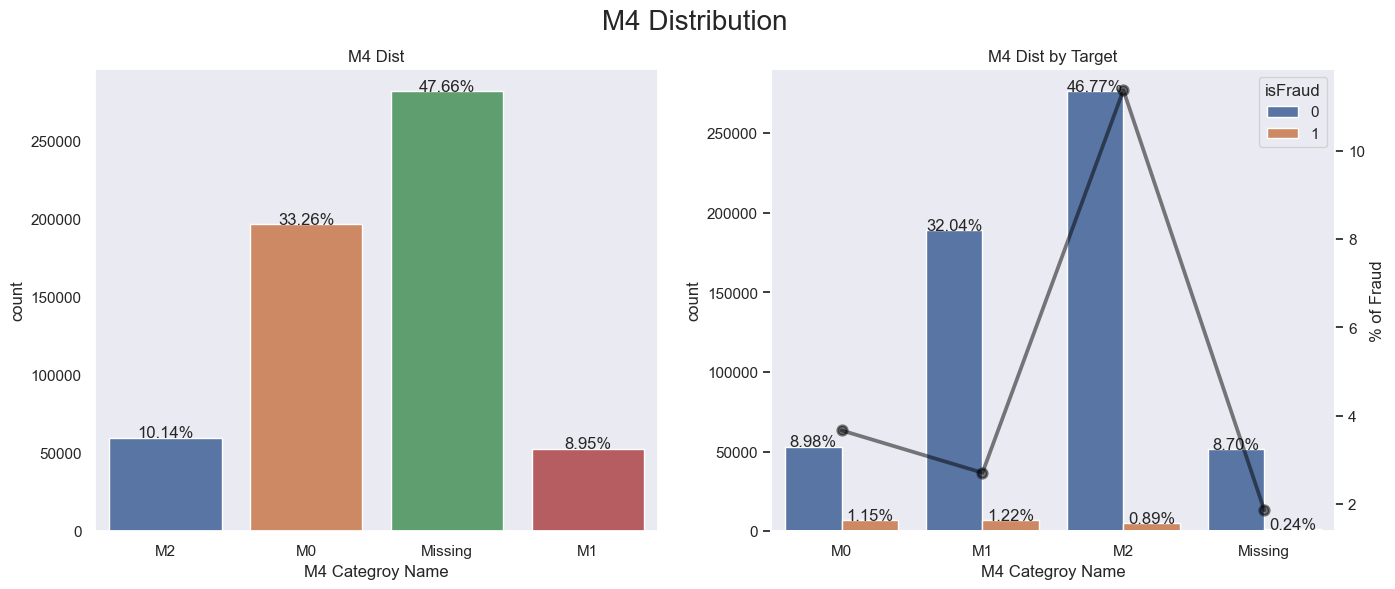

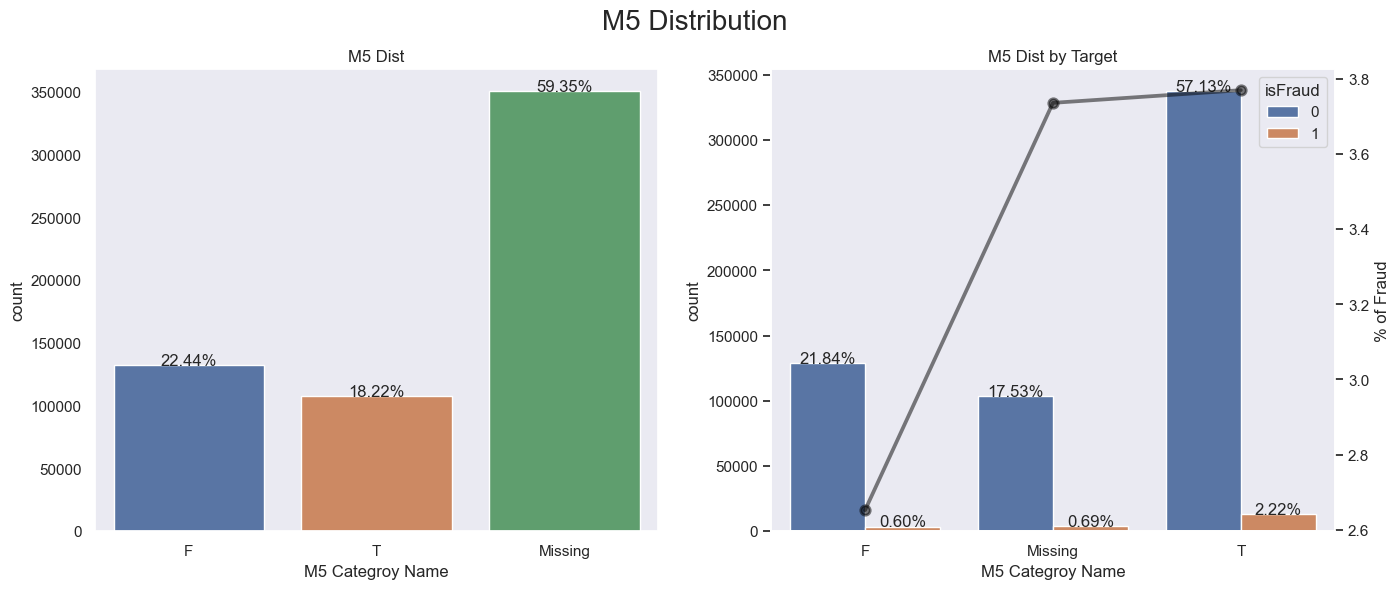

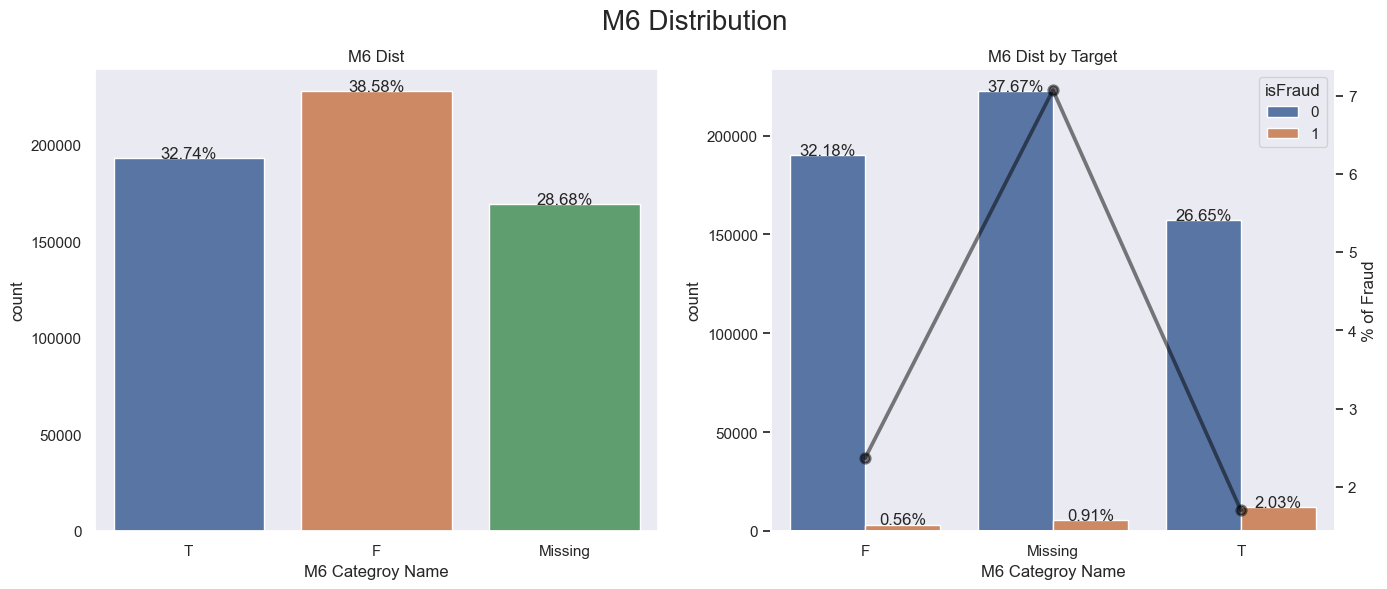

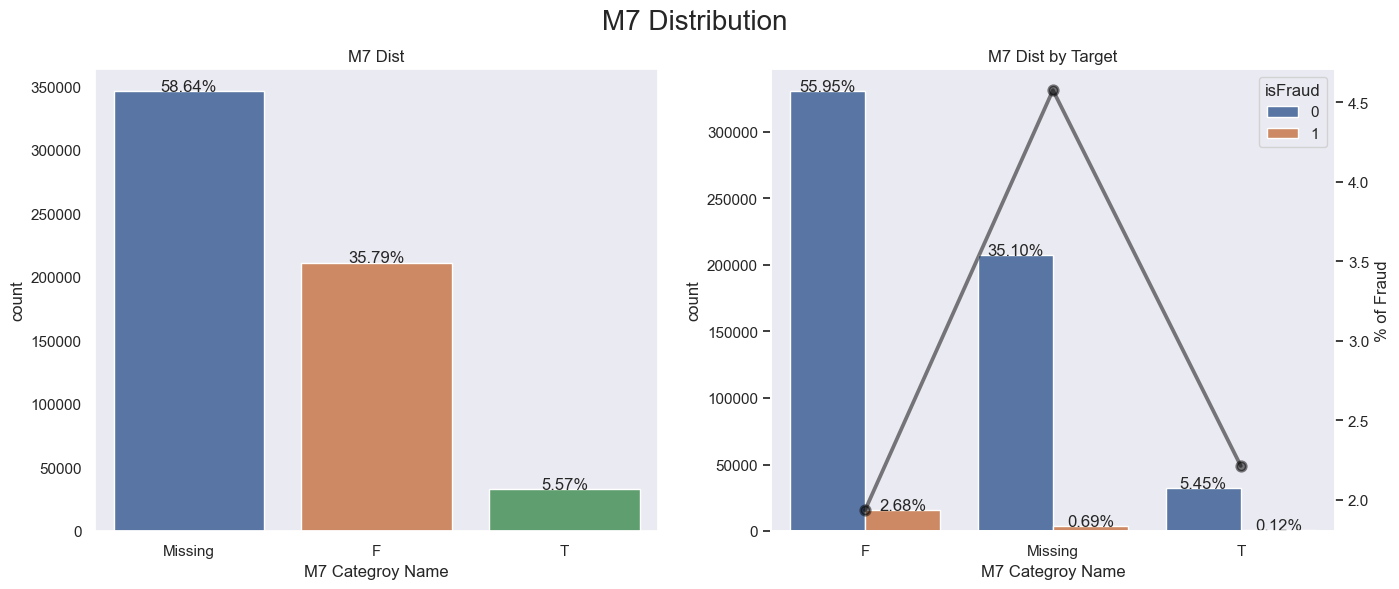

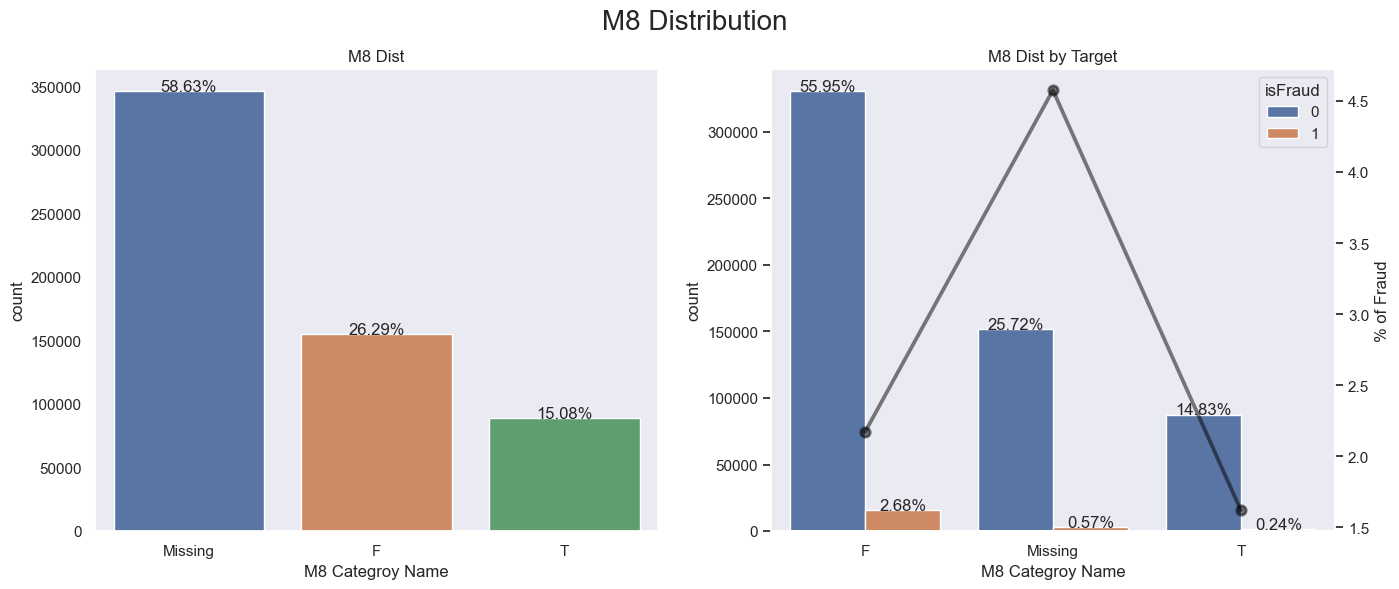

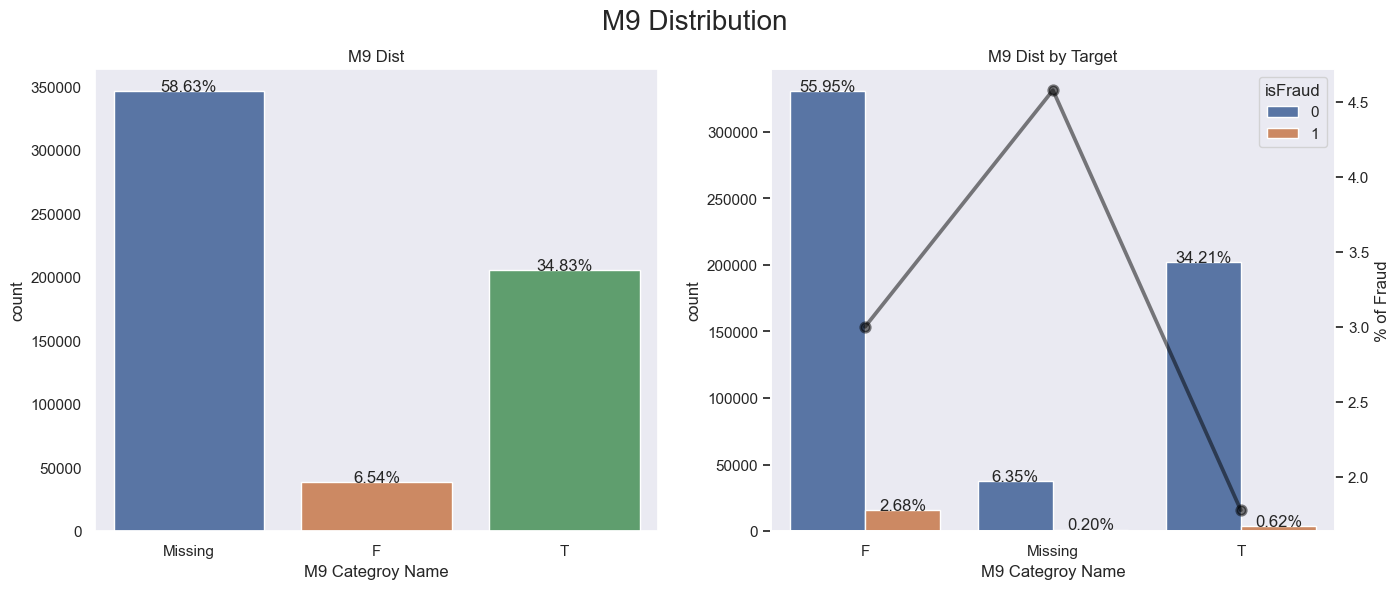

In [102]:
for c in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    plot_dist(data=M_df, col=c)

- M4를 제외한 모든 칼럼에서 Missing data 즉 na인 경우에 높은 사기율을 보여줌 NA를 따로 범주형으로 제작할필요가 있어보임!!!!

## Addr1, Addr2

In [105]:
resumetable(df_tran[["addr1", "addr2"]])

Dataset Shape: (590540, 2)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,addr1,float64,65706,332,315.0,325.0,330.0
1,addr2,float64,65706,74,87.0,87.0,87.0


In [106]:
df_tran[["addr1", "addr2"]].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

,addr1,addr2
count,524834.000000,524834.000000
mean,290.733794,86.800630
std,101.741072,2.690623
min,100.000000,10.000000
1%,123.000000,87.000000
25%,204.000000,87.000000
50%,299.000000,87.000000
75%,330.000000,87.000000
99%,512.000000,87.000000
max,540.000000,102.000000


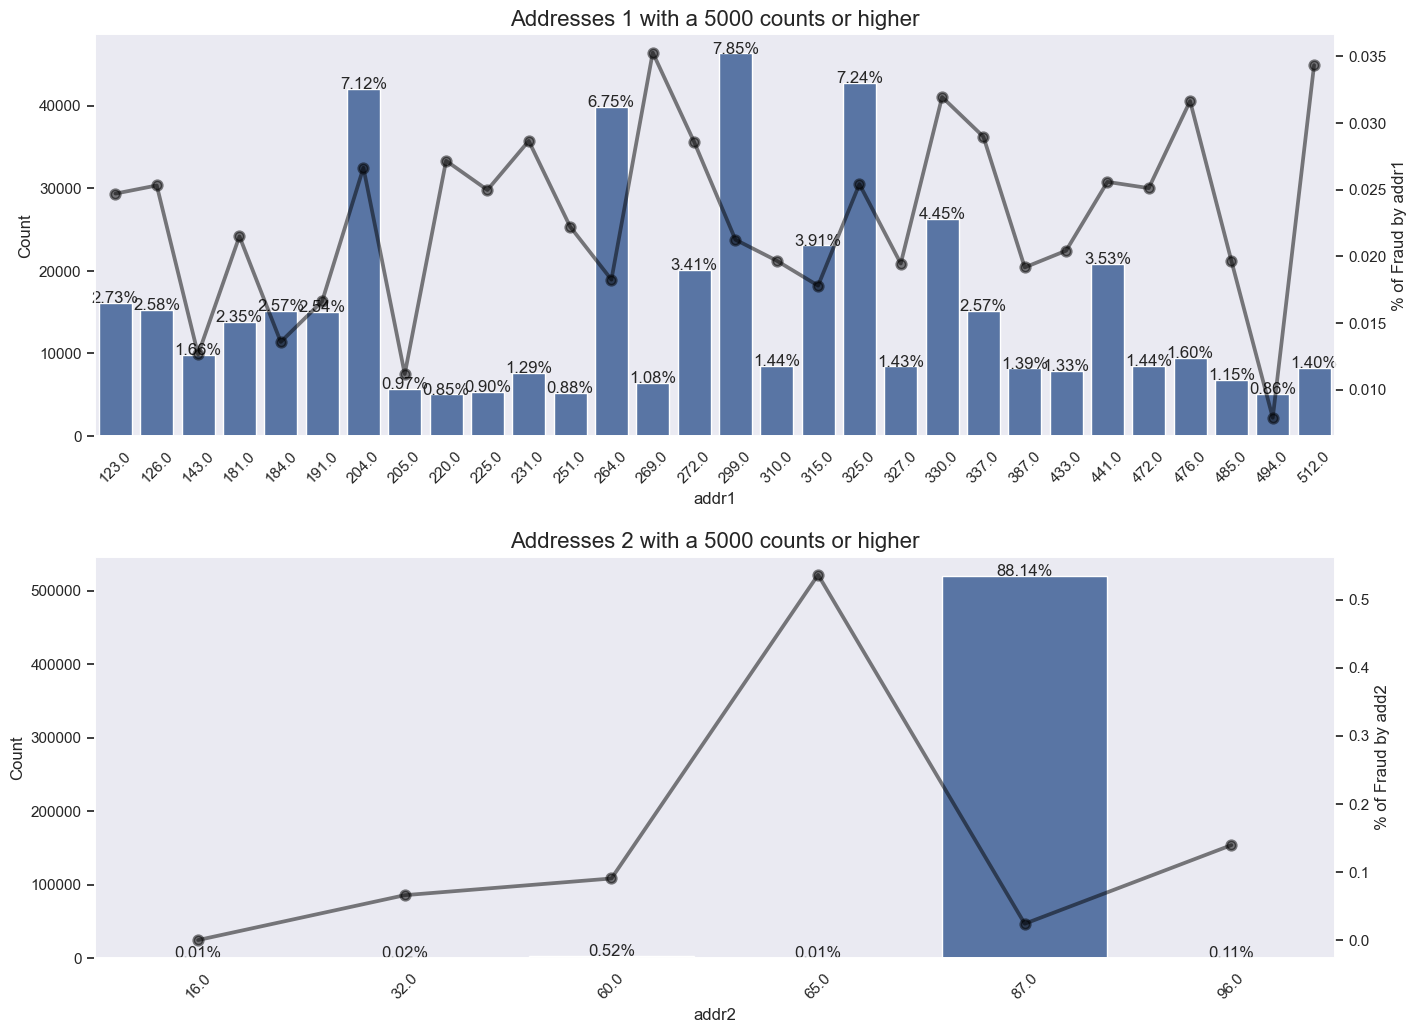

In [ ]:
fraud_rate1 = df_tran.groupby("addr1")["isFraud"].mean()
addr1_count = df_tran.groupby("addr1")["isFraud"].count()

fraud_rate2 = df_tran.groupby("addr2")["isFraud"].mean()
addr2_count = df_tran.groupby("addr2")["isFraud"].count()

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
p1 = sns.barplot(data=addr1_count[addr1_count > 5000])
p1.set_title("Addresses 1 with a 5000 counts or higher", fontsize = 16)
p1.set_ylabel("Count")
for p in p1.patches:
        height = p.get_height()
        if height > 0:
            plt.text(p.get_x() + p.get_width()/2.,
                    height + 3,
                    f"{height/total*100:1.2f}%",
                    ha = "center", fontsize = 12)
plt.xticks(rotation=45)
pt = p1.twinx()
pt = sns.pointplot(fraud_rate1[addr1_count > 5000], color= "black", alpha = 0.5)
pt.set_ylabel("% of Fraud by addr1")


plt.subplot(2,1,2)
p2 = sns.barplot(data=addr2_count[addr2_count > 50])
p2.set_title("Addresses 2 with a 50 counts or higher", fontsize = 16)
p2.set_ylabel("Count")
for p in p2.patches:
        height = p.get_height()
        if height > 0:
            plt.text(p.get_x() + p.get_width()/2.,
                    height + 3,
                    f"{height/total*100:1.2f}%",
                    ha = "center", fontsize = 12)
plt.xticks(rotation=45)
pt = p2.twinx()
pt = sns.pointplot(fraud_rate2[addr2_count > 50], color= "black", alpha = 0.5)
pt.set_ylabel("% of Fraud by add2")

plt.subplots_adjust(hspace=0.3)

- 높은 빈도가 아닌데도 높은 사기율을 보이는 주소데이터가 존재!

## Email

In [178]:
resumetable(df_tran[["P_emaildomain", "R_emaildomain"]])

Dataset Shape: (590540, 2)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,P_emaildomain,object,94456,59,NaN,gmail.com,outlook.com
1,R_emaildomain,object,453249,60,NaN,NaN,NaN


In [188]:
df_tran["P_emaildomain"].value_counts()

P_emaildomain
gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com   

- Gmail의 형식이 "gmail.com", "gmail" 이런식으로 나뉜다.. 벌써 머리가 아파온다
- 야후도 비슷한 문제가 있는 것으로 보인다
- 더 큰일난 것은 hotmail, outlook이런 것들은 마이크로 소프트 메일... 

---
- 답이없는 듯 하다. 지피티의 도움을 받는것으로

### 📌 **이메일 도메인 그룹화**
| 묶인 도메인 | 그룹명 |
|------------|--------|
| gmail.com, gmail | **구글 (Google Mail)** |
| yahoo.com, ymail.com, rocketmail.com, yahoo.com.mx, yahoo.fr, yahoo.es, yahoo.de, yahoo.co.uk, yahoo.co.jp | **야후 (Yahoo Mail)** |
| hotmail.com, outlook.com, msn.com, live.com, live.com.mx, outlook.es, hotmail.es, hotmail.fr, hotmail.co.uk, hotmail.de, live.fr | **마이크로소프트 (Microsoft Mail)** |
| aol.com, aim.com | **AOL** |
| comcast.net | **Comcast** |
| icloud.com, me.com, mac.com | **애플 (Apple Mail)** |
| sbcglobal.net, att.net, bellsouth.net, prodigy.net.mx | **AT&T** |
| verizon.net, frontier.com, frontiernet.net | **Verizon** |
| cox.net | **Cox Communications** |
| charter.net | **Charter Spectrum** |
| optonline.net | **Optimum (Altice USA)** |
| earthlink.net | **EarthLink** |
| windstream.net | **Windstream** |
| embarqmail.com, centurylink.net, q.com | **CenturyLink** |
| suddenlink.net | **Suddenlink (Optimum)** |
| netzero.com, netzero.net | **NetZero** |
| twc.com, roadrunner.com, sc.rr.com, cfl.rr.com | **Time Warner Cable (TWC)** |
| gmx.de, web.de | **GMX (독일 메일 서비스)** |
| mail.com | **Mail.com** |
| protonmail.com | **ProtonMail (보안 메일 서비스)** |
| servicios-ta.com | **Servicios TA** |
| scranton.edu | **Scranton 대학 메일** |


~~지피티를 찬양하지 않을 수가 없다..~~

- 이참에 한번에 묶는 것이 현명해보인다.

In [196]:
email_groups = {
    "gmail.com": "Gmail", "gmail": "Gmail",
    "yahoo.com": "Yahoo", "ymail.com": "Yahoo", "rocketmail.com": "Yahoo", 
    "yahoo.com.mx": "Yahoo", "yahoo.fr": "Yahoo", "yahoo.es": "Yahoo", 
    "yahoo.de": "Yahoo", "yahoo.co.uk": "Yahoo", "yahoo.co.jp": "Yahoo", 
    "hotmail.com": "Microsoft", "outlook.com": "Microsoft", "msn.com": "Microsoft", 
    "live.com": "Microsoft", "live.com.mx": "Microsoft", "outlook.es": "Microsoft", 
    "hotmail.es": "Microsoft", "hotmail.fr": "Microsoft", "hotmail.co.uk": "Microsoft", 
    "hotmail.de": "Microsoft", "live.fr": "Microsoft",
    "aol.com": "AOL", "aim.com": "AOL", 
    "comcast.net": "Comcast", 
    "icloud.com": "Apple", "me.com": "Apple", "mac.com": "Apple", 
    "sbcglobal.net": "AT&T", "att.net": "AT&T", "bellsouth.net": "AT&T", "prodigy.net.mx": "AT&T", 
    "verizon.net": "Verizon", "frontier.com": "Verizon", "frontiernet.net": "Verizon", 
    "cox.net": "Cox", 
    "charter.net": "Charter", 
    "optonline.net": "Optimum", 
    "earthlink.net": "EarthLink", 
    "windstream.net": "Windstream", 
    "embarqmail.com": "CenturyLink", "centurylink.net": "CenturyLink", "q.com": "CenturyLink", 
    "suddenlink.net": "Suddenlink", 
    "netzero.com": "NetZero", "netzero.net": "NetZero", 
    "twc.com": "TWC", "roadrunner.com": "TWC", "sc.rr.com": "TWC", "cfl.rr.com": "TWC", 
    "gmx.de": "GMX", "web.de": "GMX", 
    "mail.com": "Mail.com", 
    "protonmail.com": "ProtonMail", 
    "servicios-ta.com": "Servicios-TA", 
    "scranton.edu": "Scranton",
    "cableone.net" : "Cableone",
    "anonymous.com" : "Anonymous"
}



In [ ]:
tmp1 = df_tran["P_emaildomain"].apply(lambda x : email_groups.get(x, x))
tmp2 = df_tran["R_emaildomain"].apply(lambda x : email_groups.get(x, x))

In [202]:
df_tran["P_emaildomain"] = tmp1
df_tran["R_emaildomain"] = tmp2

In [ ]:
resumetable(df_tran[["P_emaildomain", "P_emaildomain"]])

Dataset Shape: (590540, 2)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,P_emaildomain,object,94456,25,NaN,Gmail,Microsoft
1,R_emaildomain,object,453249,26,NaN,NaN,NaN


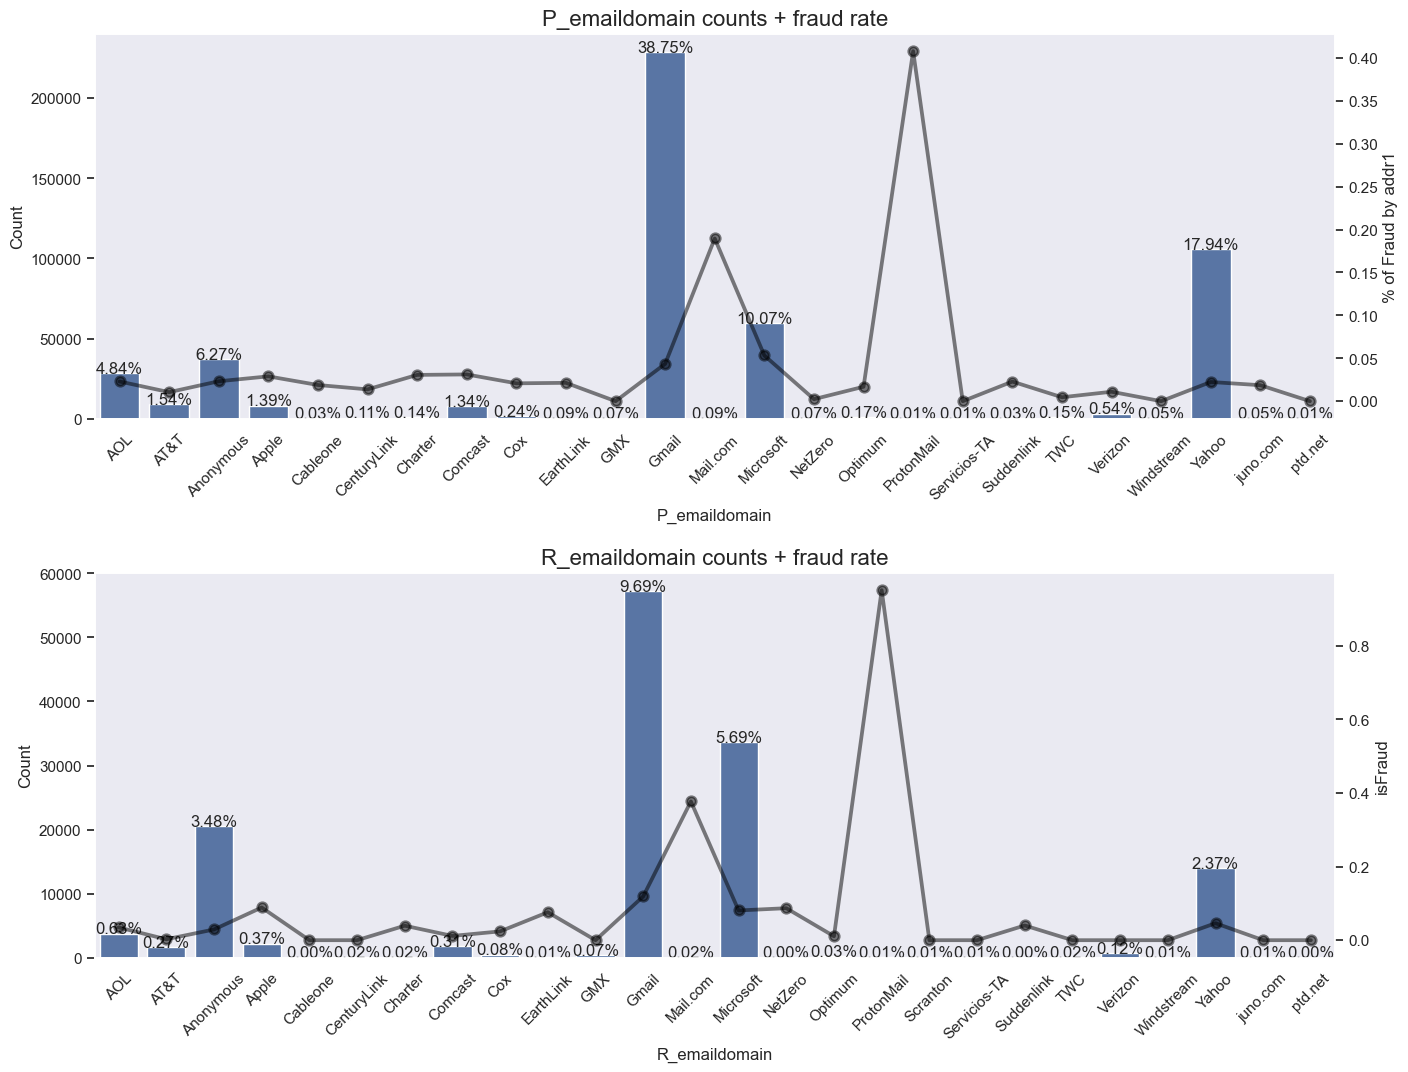

In [243]:
fraud_rate1 = df_tran.groupby("P_emaildomain")["isFraud"].mean()
mail1_count = df_tran.groupby("P_emaildomain")["isFraud"].count()

fraud_rate2 = df_tran.groupby("R_emaildomain")["isFraud"].mean()
mail2_count = df_tran.groupby("R_emaildomain")["isFraud"].count()

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
p1 = sns.barplot(data=mail1_count)
p1.set_title("P_emaildomain counts + fraud rate", fontsize = 16)
p1.set_ylabel("Count")
for p in p1.patches:
        height = p.get_height()
        if height > 0:
            plt.text(p.get_x() + p.get_width()/2.,
                    height + 3,
                    f"{height/total*100:1.2f}%",
                    ha = "center", fontsize = 12)
plt.xticks(rotation=45)
pt = p1.twinx()
pt = sns.pointplot(fraud_rate1, color= "black", alpha = 0.5)
pt.set_ylabel("% of Fraud by addr1")


plt.subplot(2,1,2)
p2 = sns.barplot(data=mail2_count)
p2.set_title("R_emaildomain counts + fraud rate", fontsize = 16)
p2.set_ylabel("Count")
for p in p2.patches:
        height = p.get_height()
        if height > 0:
            plt.text(p.get_x() + p.get_width()/2.,
                    height + 3,
                    f"{height/total*100:1.2f}%",
                    ha = "center", fontsize = 12)
plt.xticks(rotation=45)
pt = p2.twinx()
pt = sns.pointplot(fraud_rate2, color= "black", alpha = 0.5)

plt.subplots_adjust(hspace=0.4)

- 특정 도메인에서 매우 높은 수치의 사기가 나타나는 것을 볼 수 있었다

## C1 ~ C14 Features

In [228]:
resumetable(df_tran[["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14"]])

Dataset Shape: (590540, 14)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,C1,float64,0,1657,1.0,1.0,1.0
1,C2,float64,0,1216,1.0,1.0,1.0
2,C3,float64,0,27,0.0,0.0,0.0
3,C4,float64,0,1260,0.0,0.0,0.0
4,C5,float64,0,319,0.0,0.0,0.0
5,C6,float64,0,1328,1.0,1.0,1.0
6,C7,float64,0,1103,0.0,0.0,0.0
7,C8,float64,0,1253,0.0,0.0,0.0
8,C9,float64,0,205,1.0,0.0,1.0
9,C10,float64,0,1231,0.0,0.0,0.0


- 결측치가 하나도 없음.

In [229]:
df_tran[["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14"]].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
99%,164.000000,154.000000,0.000000,6.000000,149.000000,118.000000,4.000000,11.000000,95.000000,15.000000,122.000000,5.000000,578.000000,128.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


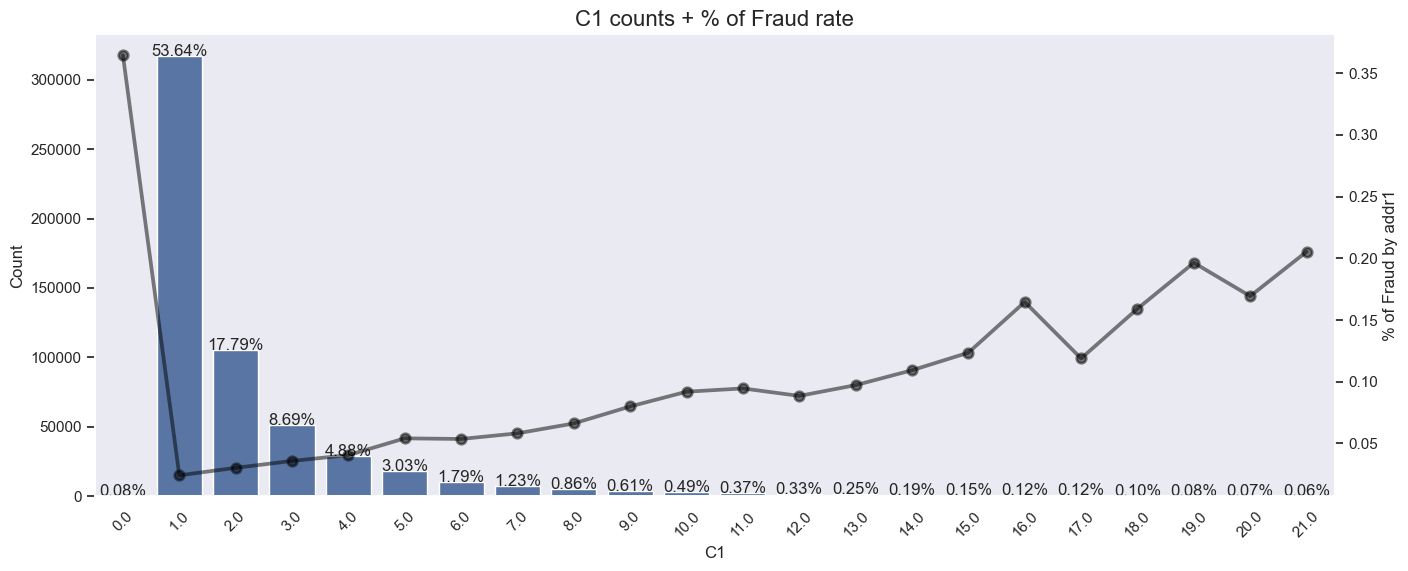

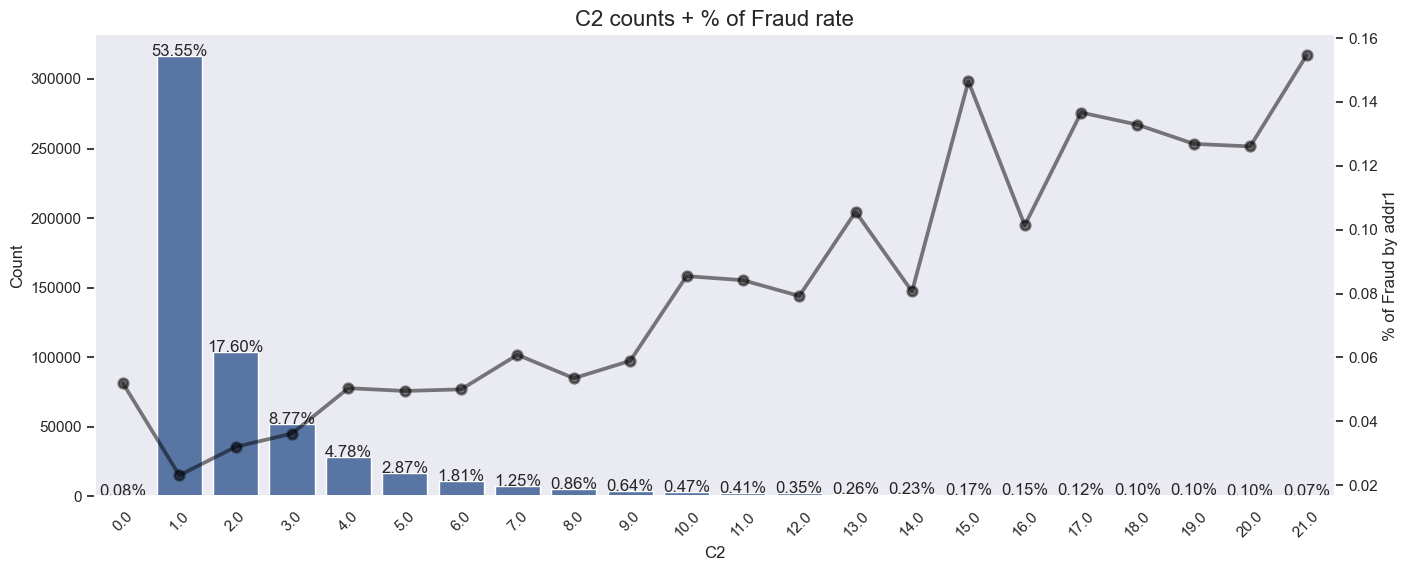

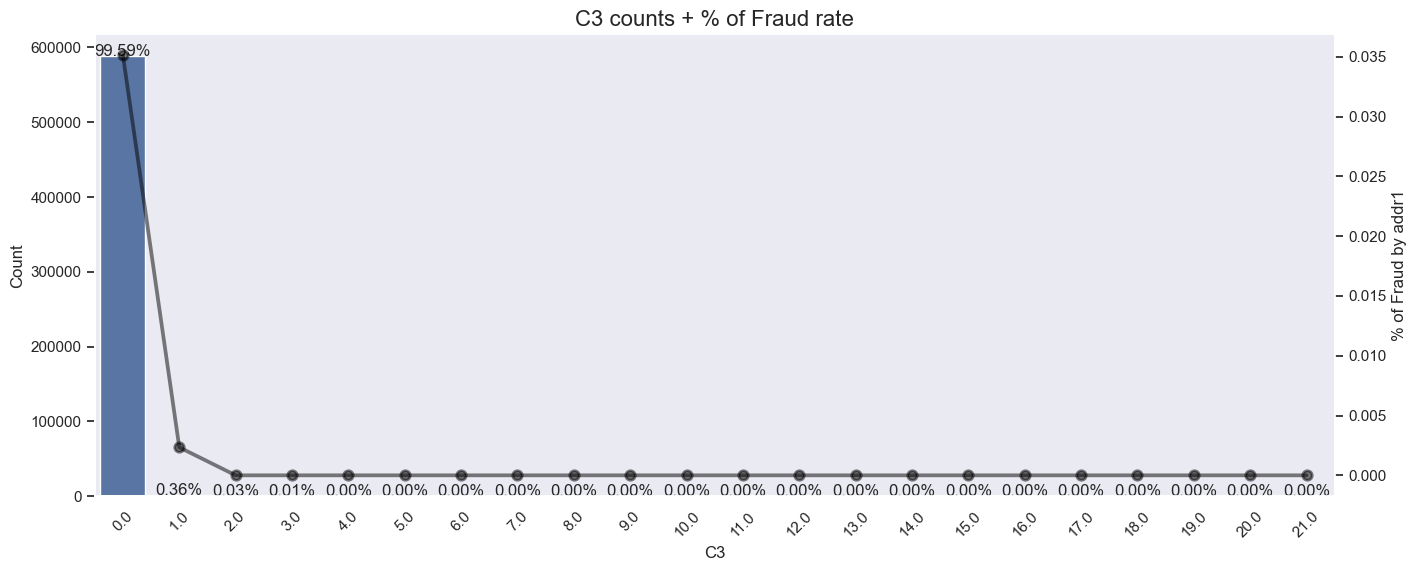

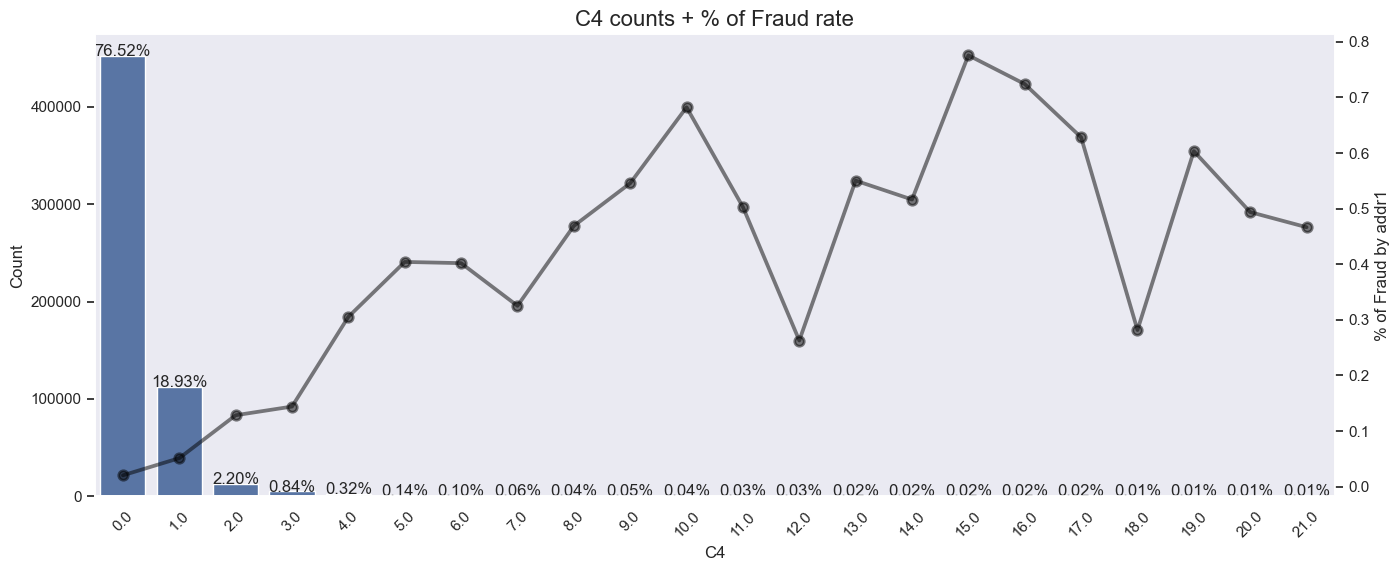

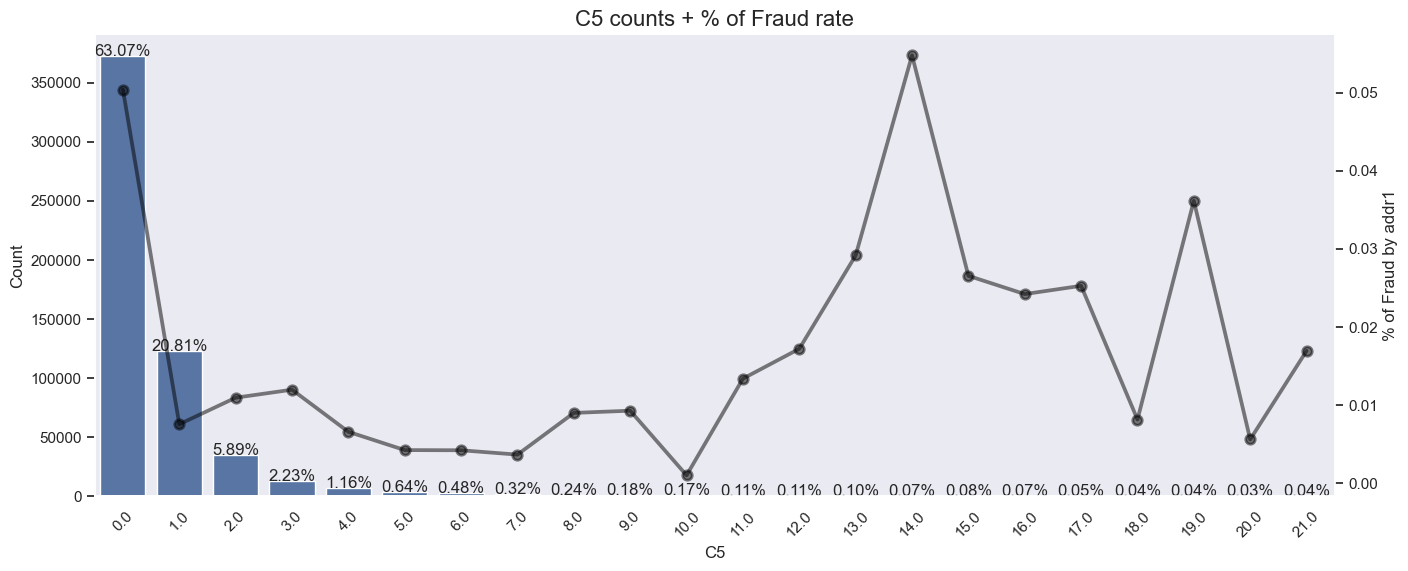

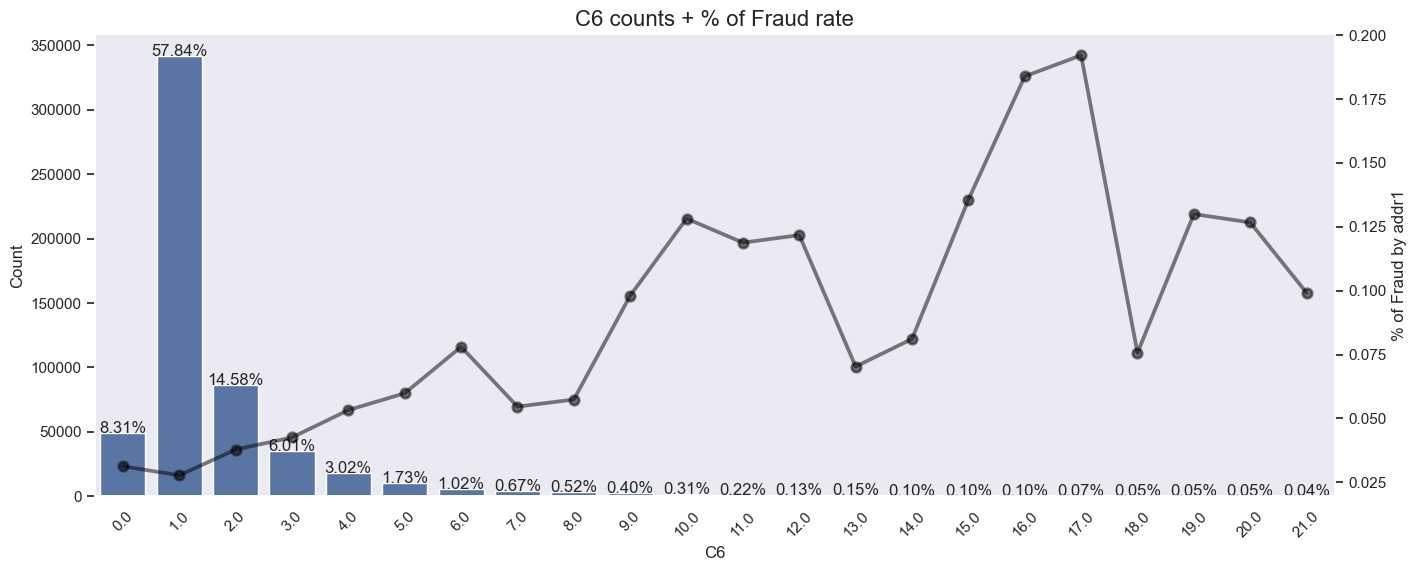

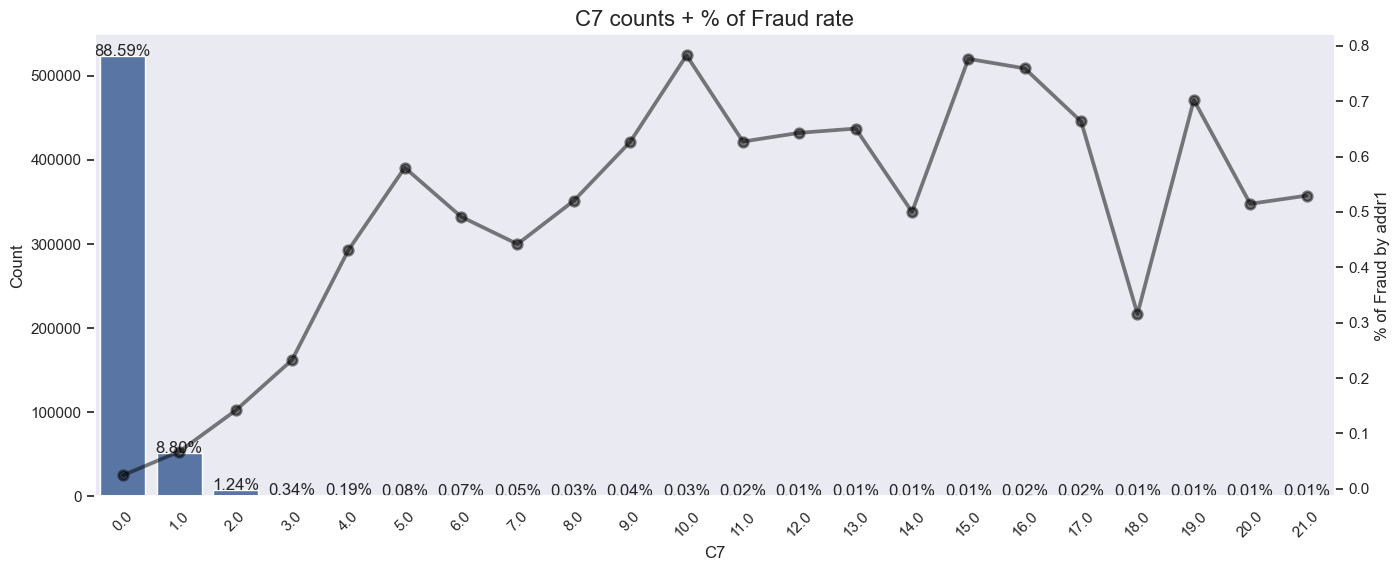

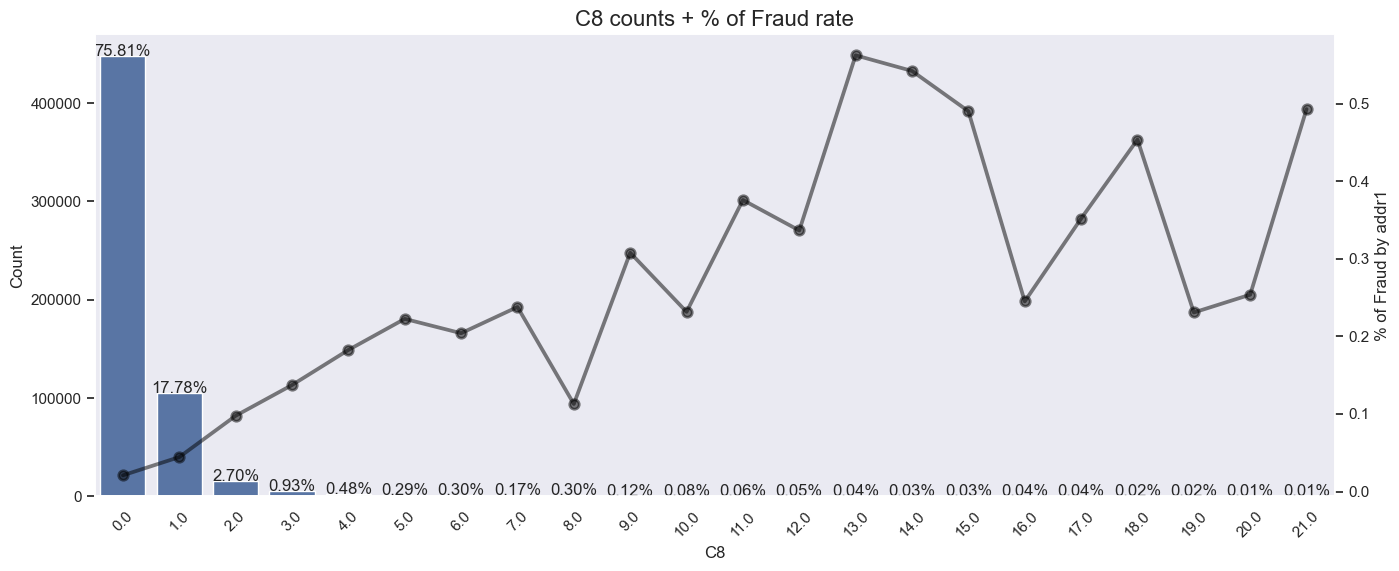

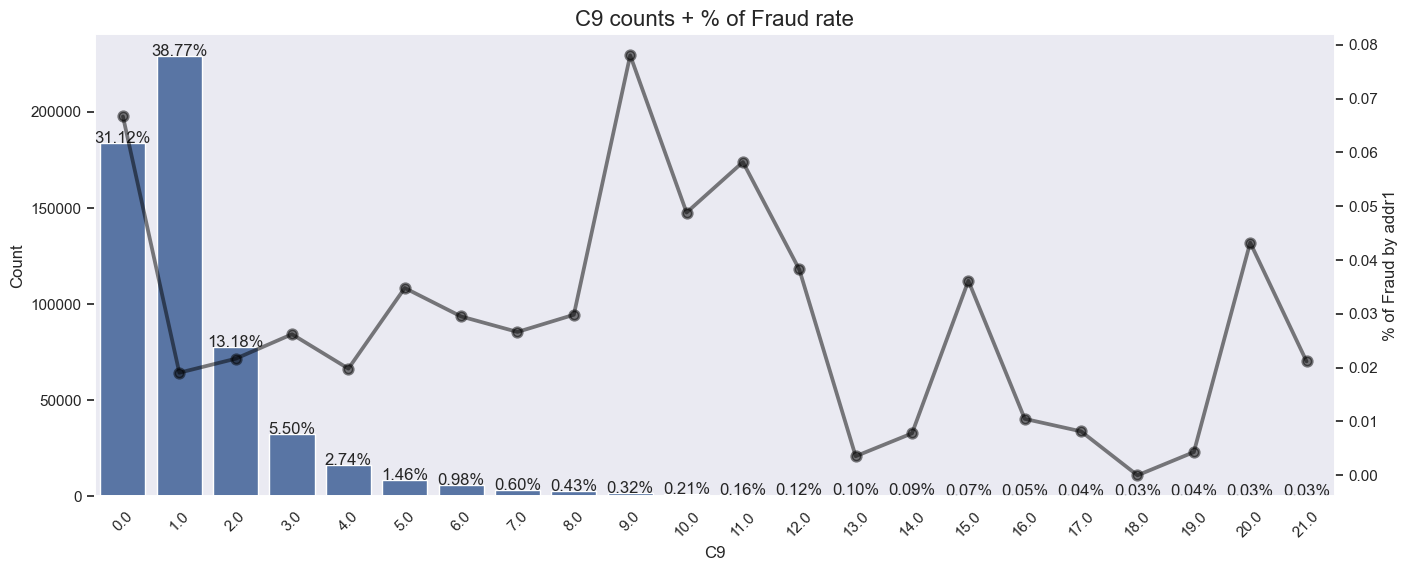

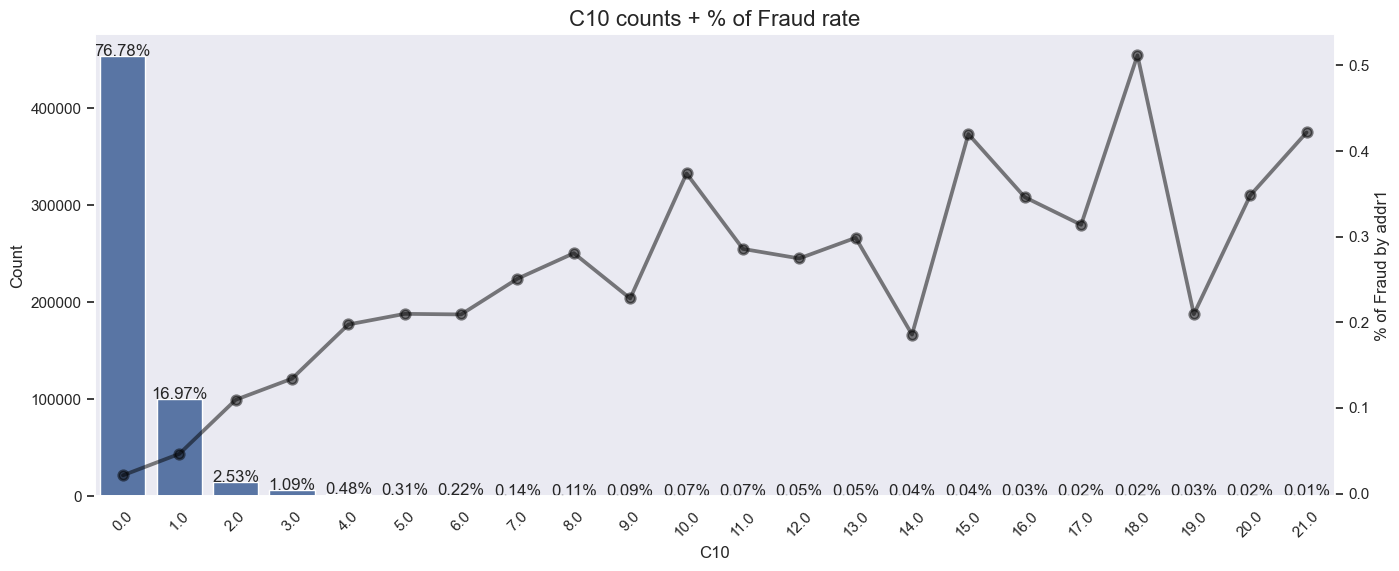

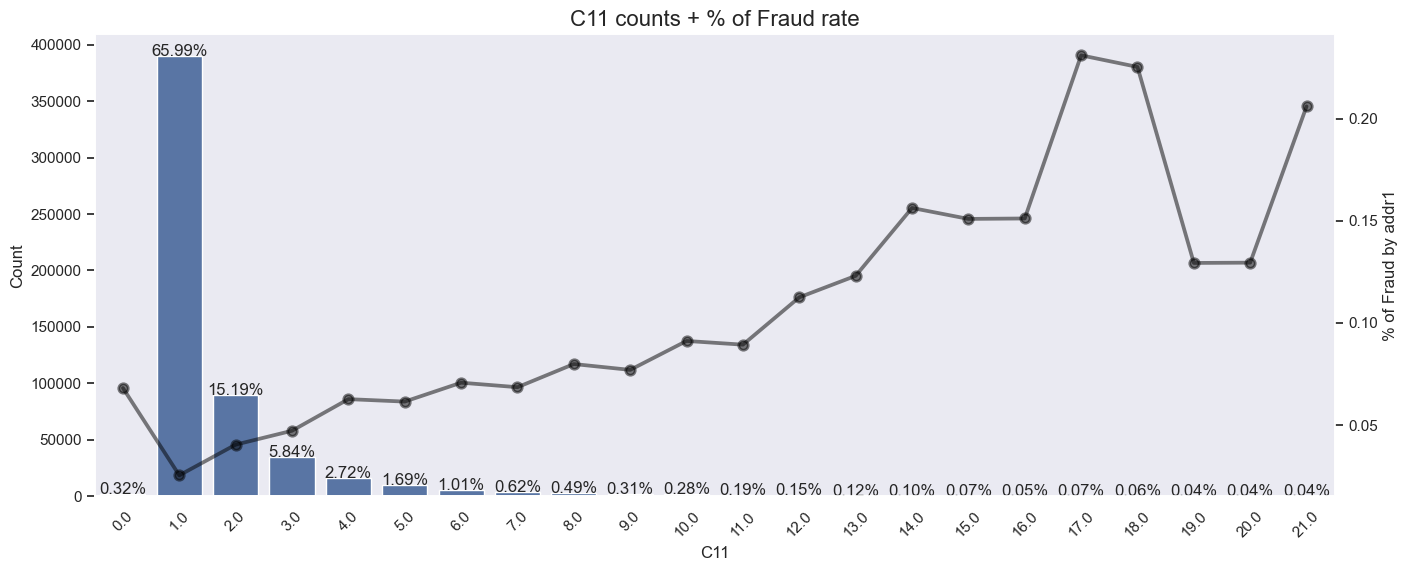

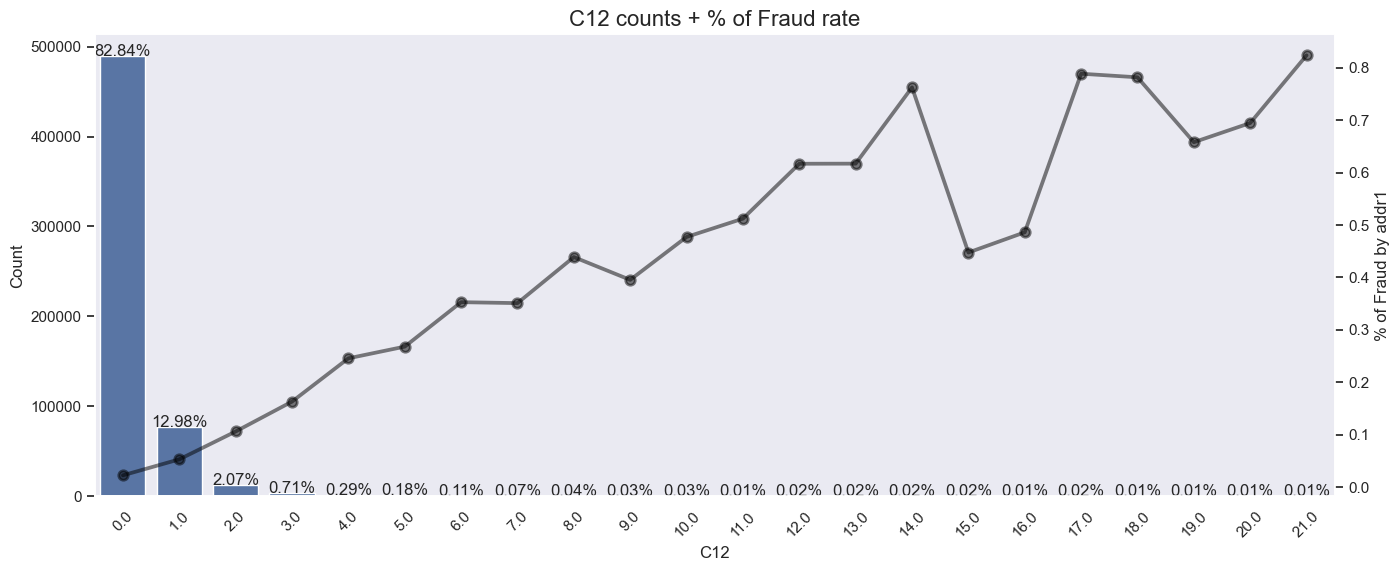

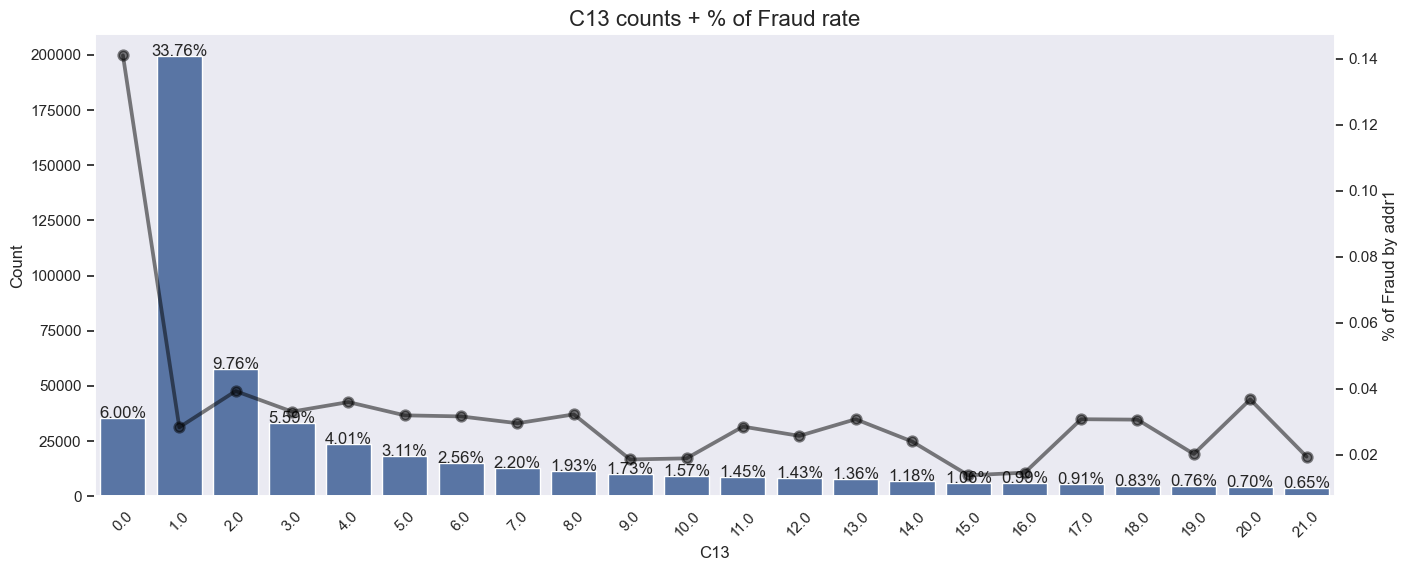

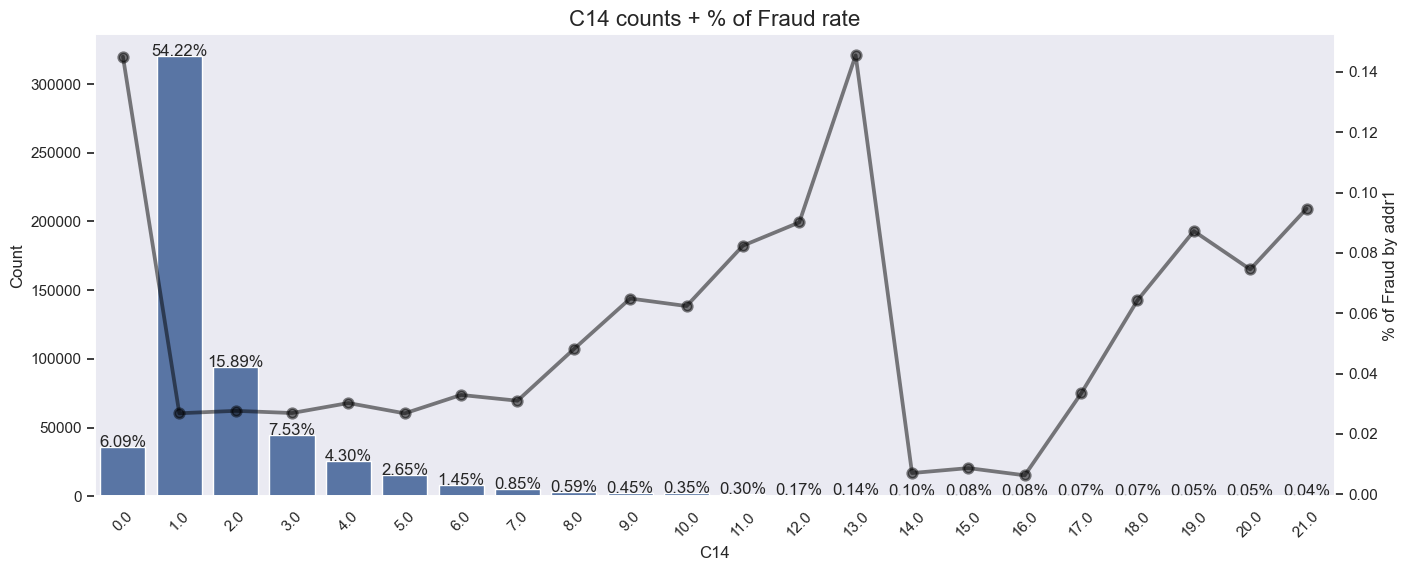

In [259]:
def plot_cnt(data, col, end):
        rate = data.groupby(col)["isFraud"].mean()
        count = data.groupby(col)["isFraud"].count()

        plt.figure(figsize=(16,6))

        p1 = sns.barplot(data=count[:end])
        p1.set_title(f"{col} counts + % of Fraud rate", fontsize = 16)
        p1.set_ylabel("Count")
        for p in p1.patches:
                height = p.get_height()
                if height > 0:
                        plt.text(p.get_x() + p.get_width()/2.,
                        height + 3,
                        f"{height/total*100:1.2f}%",
                        ha = "center", fontsize = 12)
        plt.xticks(rotation=45)
        pt = p1.twinx()
        pt = sns.pointplot(rate[:end], color= "black", alpha = 0.5)
        pt.set_ylabel("% of Fraud by addr1")

for c in ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14"]:
        plot_cnt(df_tran, c, 21)

- 항상 그렇지는 않으나 전반적으로 커질 수록 증가하는 모습을 보인다.

## TimeDelta Features

https://www.kaggle.com/c/ieee-fraud-detection/discussion/100400#latest-579480

- 위 링크를 참고

In [ ]:
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
df_tran['TransactionDT'] = df_tran['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

df_tran['Year'] = df_tran['TransactionDT'].dt.year
df_tran['Month'] = df_tran['TransactionDT'].dt.month
df_tran['Weekday'] = df_tran['TransactionDT'].dt.dayofweek
df_tran['Hour'] = df_tran['TransactionDT'].dt.hour
df_tran['Day'] = df_tran['TransactionDT'].dt.day


In [ ]:
# 6개월 치 데이터이므로 큰 의미 없는 열들 -> 이후에 drop
print(df_tran["Year"].unique())
print(df_tran["Month"].unique())

[2017 2018]
[12  1  2  3  4  5  6]


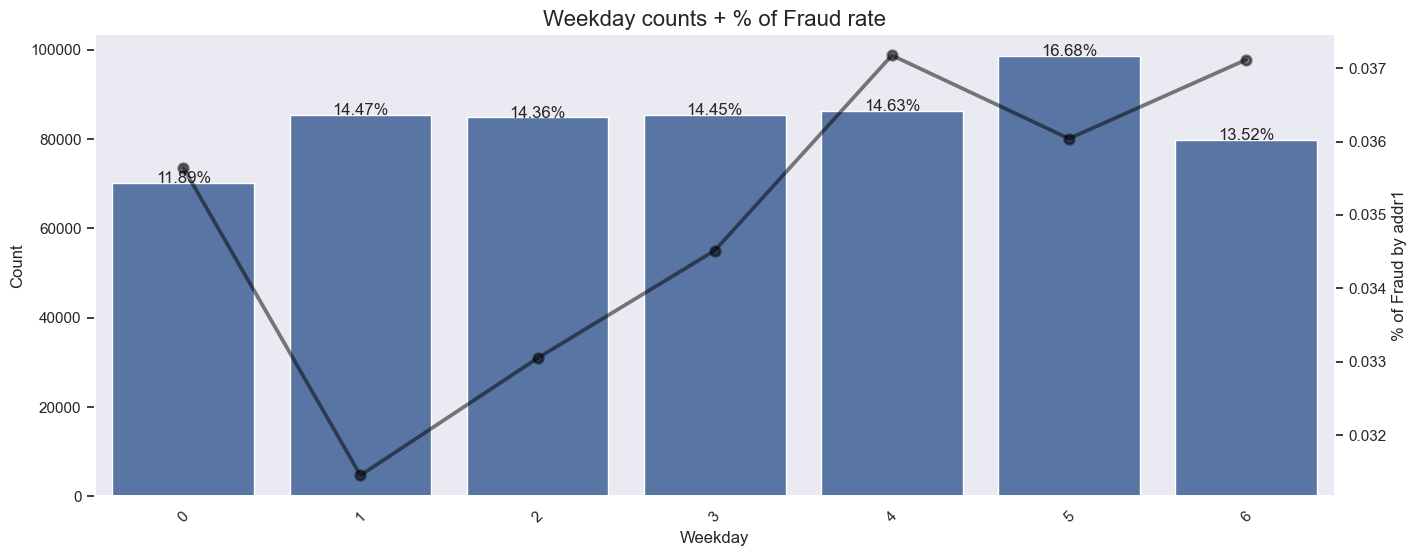

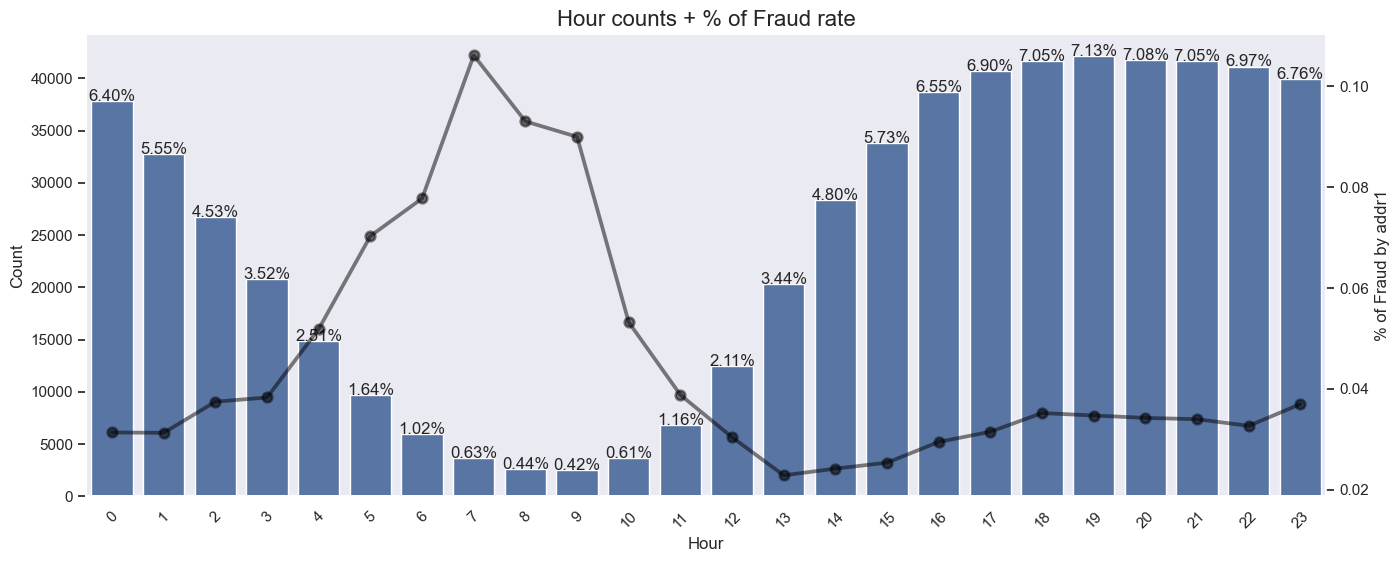

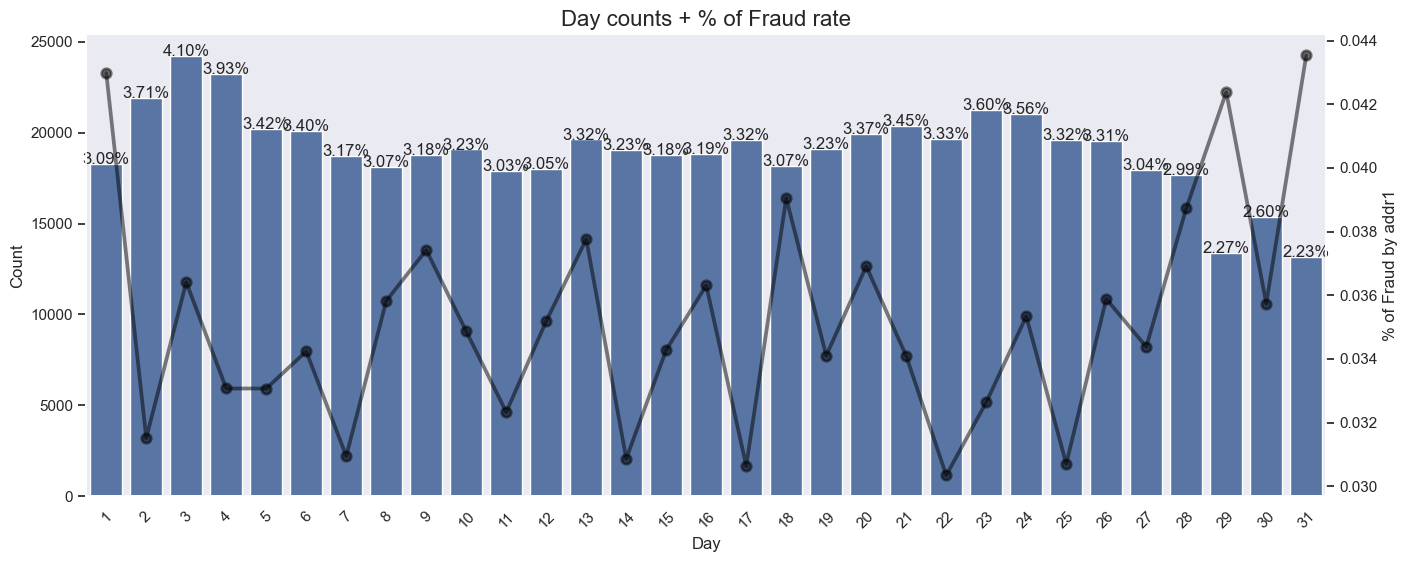

In [254]:
plot_cnt(df_tran, "Weekday", df_tran["Weekday"].nunique())
plot_cnt(df_tran, "Hour", df_tran["Hour"].nunique())
plot_cnt(df_tran, "Day", df_tran["Day"].nunique())

- 거래량이 적은 아침시간대에서 사기율이 높아 보인다. 하지만 거래량이 적기 떄문에 일어난 현상으로 볼 수도 있다.
- 주말시간대에 전반적으로 높은 사기율이 보인다

## V1 ~ V339
- 직접 데이터를 확인해보는 것은 어렵다
- NA값이 매우많은 열은 삭제하고 변수중요도 분석 등의 방법으로 변수선택이 필수적인 듯하다.

## ID Features

In [245]:
resumetable(df_id)

Dataset Shape: (144233, 41)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,TransactionID,int64,0,144233,2987004,2987008,2987010
1,id_01,float64,0,77,0.0,-5.0,-5.0
2,id_02,float64,3361,115655,70787.0,98945.0,191631.0
3,id_03,float64,77909,24,NaN,NaN,0.0
4,id_04,float64,77909,15,NaN,NaN,0.0
5,id_05,float64,7368,93,NaN,0.0,0.0
6,id_06,float64,7368,101,NaN,-5.0,0.0
7,id_07,float64,139078,84,NaN,NaN,NaN
8,id_08,float64,139078,94,NaN,NaN,NaN
9,id_09,float64,69307,46,NaN,NaN,0.0
